In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['movieId', 'title', 'genres'])
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])
#加载库，读入数据集

KeyboardInterrupt: 

In [8]:
print(len(ratings_df))#查看类型数据集大小

10000054


In [3]:
print(len(movies_df))#查看评分数据集的大小

10681


In [4]:
movies_df.head()#查看类型数据集的前五个数据

movieId                               title   
0        1                    Toy Story (1995)  \
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
movies_df.describe()#查看类型数据集的五数属性

movieId
count  10681.000000
mean   13120.523546
std    17808.849139
min        1.000000
25%     2755.000000
50%     5436.000000
75%     8713.000000
max    65133.000000

In [6]:
# 标称属性的频数统计
print("电影类型标称属性频数统计：")
print(movies_df['genres'].value_counts())

# 数值属性的五数概括及缺失值个数
print("\n电影评分数值属性五数概括：")
print(ratings_df.describe())

print("\n电影评分数值属性缺失值个数：")
print(ratings_df.isnull().sum())

电影类型标称属性频数统计：
genres
Drama                                      1817
Comedy                                     1047
Comedy|Drama                                551
Drama|Romance                               412
Comedy|Romance                              379
                                           ... 
Animation|Fantasy|Horror                      1
Action|Fantasy|Mystery|Thriller               1
Action|Adventure|Romance|Thriller             1
Documentary|Drama|Romance|War                 1
Action|Adventure|Fantasy|Horror|Romance       1
Name: count, Length: 797, dtype: int64

电影评分数值属性五数概括：
             userId       movieId        rating     timestamp
count  1.000005e+07  1.000005e+07  1.000005e+07  1.000005e+07
mean   3.586986e+04  4.120291e+03  3.512422e+00  1.032606e+09
std    2.058534e+04  8.938402e+03  1.060418e+00  1.159640e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    1.812300e+04  6.480000e+02  3.000000e+00  9.467659e+08
50%    3.574050e+04  1.83

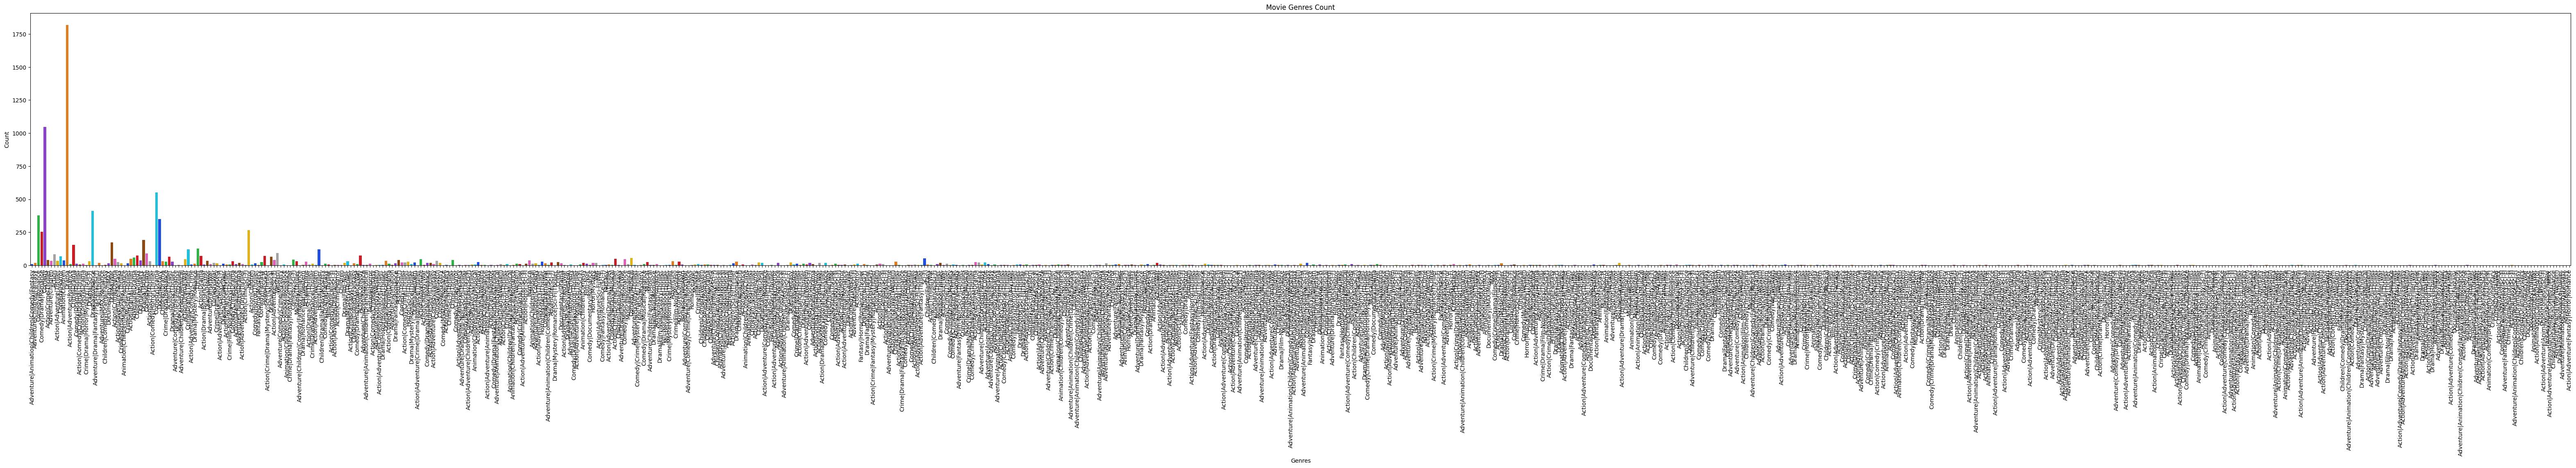

In [9]:
# 电影类型直方图
plt.figure(figsize=(80,8))
sns.countplot(x='genres', data=movies_df, palette='bright')
plt.title("Movie Genres Count")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

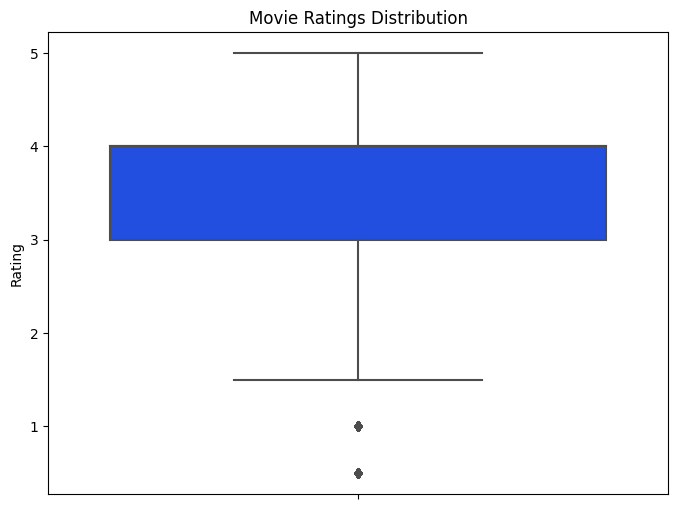

In [10]:
# 电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_df, palette='bright')
plt.title("Movie Ratings Distribution")
plt.ylabel("Rating")
plt.show()

In [14]:
ratings_dropna = ratings_df.dropna(subset=['rating'])

In [15]:
len(ratings_dropna), len(ratings_df)

(10000054, 10000054)

In [13]:
print("原始数据集电影类型属性的缺失值数量：", movies_df['genres'].isnull().sum())
print("处理后的数据集电影类型属性的缺失值数量：", movies_dropna['genres'].isnull().sum())

原始数据集电影类型属性的缺失值数量： 0
处理后的数据集电影类型属性的缺失值数量： 0


In [8]:
path = 'Alzheimer Disease and Healthy Aging Data In US.csv'
data = pd.read_csv(path, sep=',')
data = data.drop(columns=["Sample_Size"])
data['Low_Confidence_Limit'] = data['Low_Confidence_Limit'].apply(lambda x: None if x == '.' else float(x))
data['High_Confidence_Limit'] = data['High_Confidence_Limit'].apply(lambda x: None if x == '.' else float(x))
data.info()

C:\Users\18301\AppData\Local\Temp\ipykernel_28008\3887514385.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, sep=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [10]:
# 标称属性
nominal_index = ['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
# 数值属性
numerical_index = ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID']

In [19]:
def nominal_summary(df: pd.DataFrame, nominal_index, new_df=None, n=50):
    '''标称属性 给出每个可能取值的频数 可视化直方图'''
    for key in nominal_index:
        data = df[key].value_counts()
        if new_df is None:
            plt.figure(figsize=(11, 6))
            plt.title(data.name, fontsize=30)
            plt.bar(data.index[:n], data.values[:n], width=0.8)
            plt.xticks(rotation=90)
            plt.show()
        else:
            plt.figure(figsize=(22, 6))
            plt.subplot(121)
            plt.title(data.name, fontsize=30)
            plt.bar(data.index[:n], data.values[:n], width=0.8, label=data.name)
            plt.xticks(rotation=90)
            plt.subplot(122)
            new_data = new_df[key].value_counts()
            plt.title(new_data.name, fontsize=30)
            plt.bar(new_data.index[:n], new_data.values[:n], width=0.8, label='processed '+new_data.name)
            plt.xticks(rotation=90)
            plt.legend()
            plt.show()


def numerical_summary(df: pd.DataFrame, numerical_index, new_df=None):
    '''数值属性 给出五数概括及缺失值个数'''
    for key in numerical_index:
        shape = df.shape
        data = df[key]
        info = data.describe()
        print('descriptive statistics ({}):'.format(data.name))
        # 五数概括，直接利用函数计算  缺失值为总行数-有值得行数
        print("          Data: Min: {:< 2.4f}\tQ1(25%): {:< 2.4f}\tQ2(50%): {:< 2.4f}\tQ3(75%): {:< 2.4f}\tMax: {:< 2.4f}\tMissing: {:d}".format(
            info['min'], info['25%'], info['50%'], info['75%'], info['max'], int(shape[0] - info['count'])
        ))
        if new_df is not None:
            new_shape = new_df.shape
            new_data = new_df[key]
            new_info = new_data.describe()
            print("Processed Data: Min: {:< 2.4f}\tQ1(25%): {:< 2.4f}\tQ2(50%): {:< 2.4f}\tQ3(75%): {:< 2.4f}\tMax: {:< 2.4f}\tMissing: {:d}".format(
                new_info['min'], new_info['25%'], new_info['50%'], new_info['75%'], new_info['max'], int(new_shape[0] - new_info['count'])
            ))

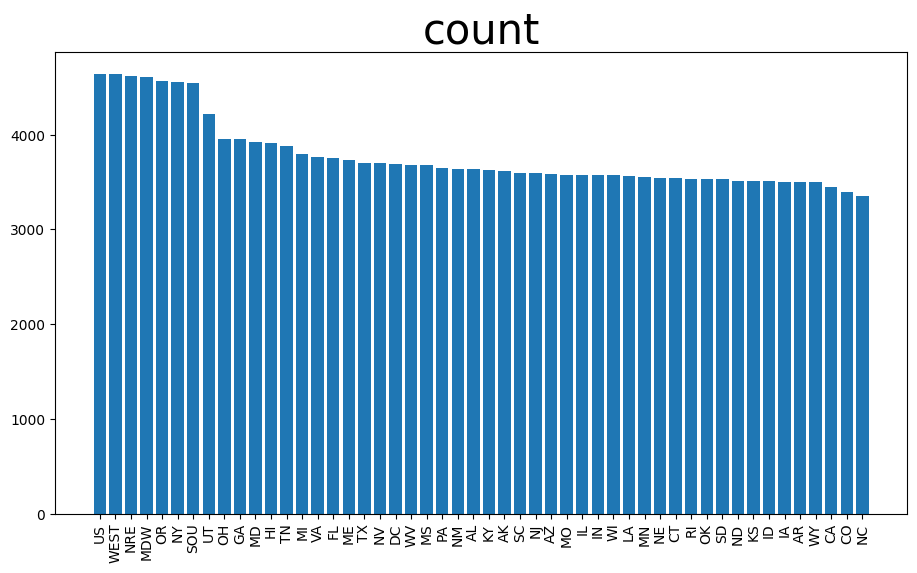

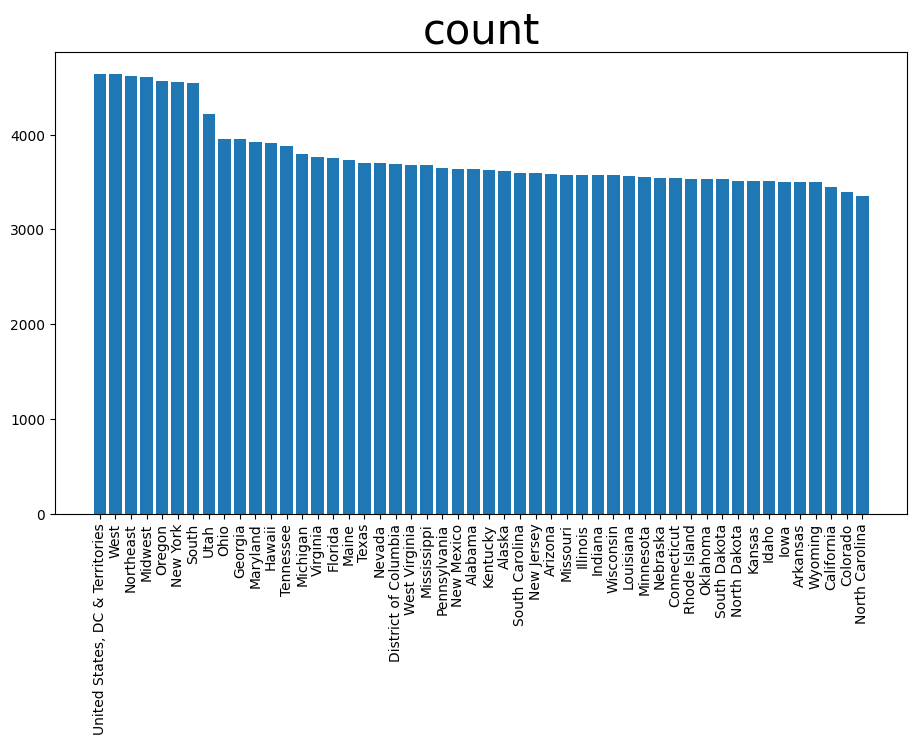

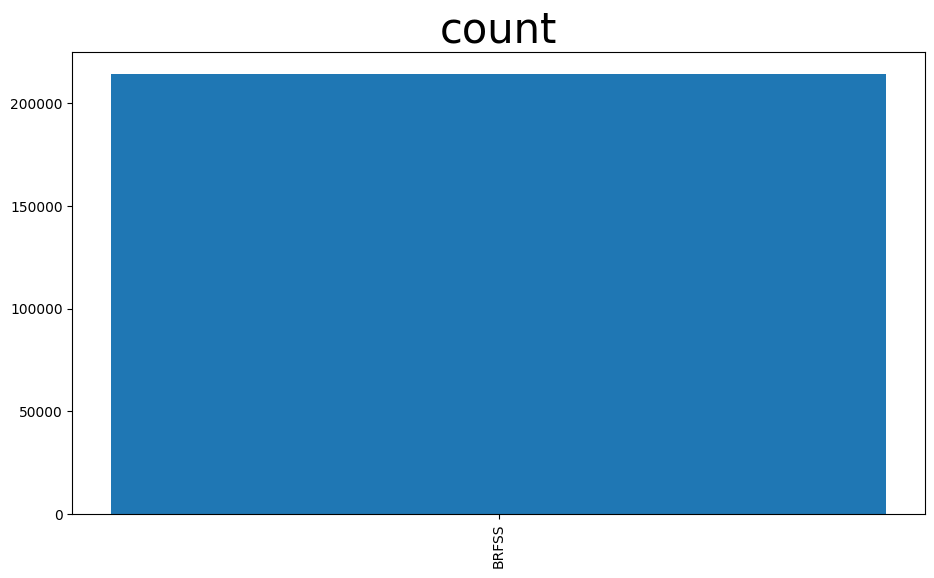

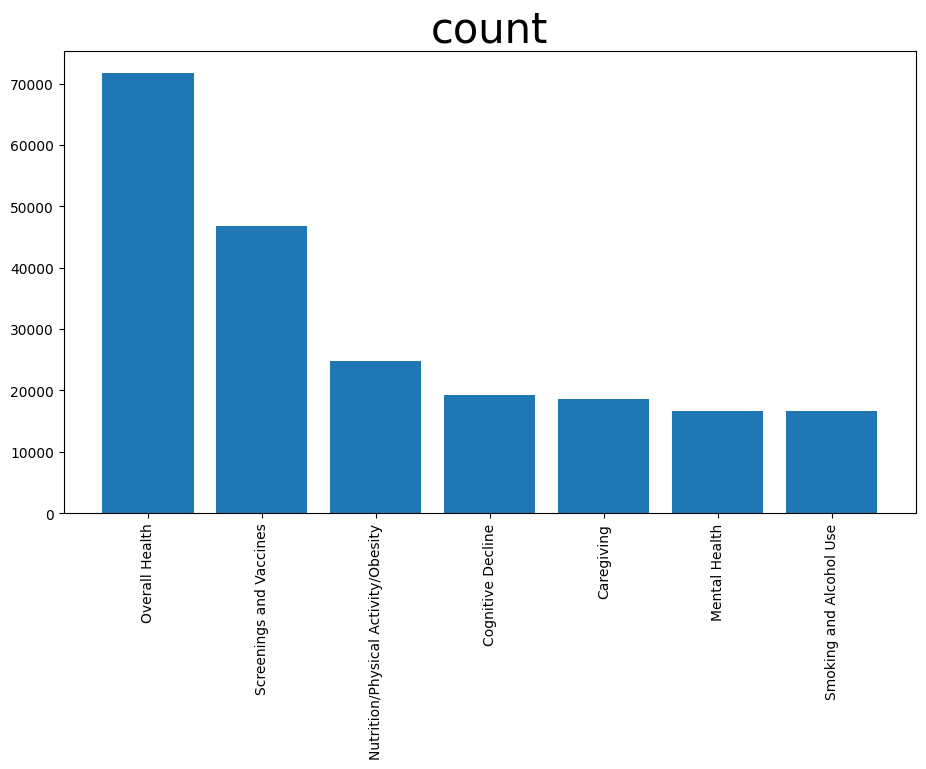

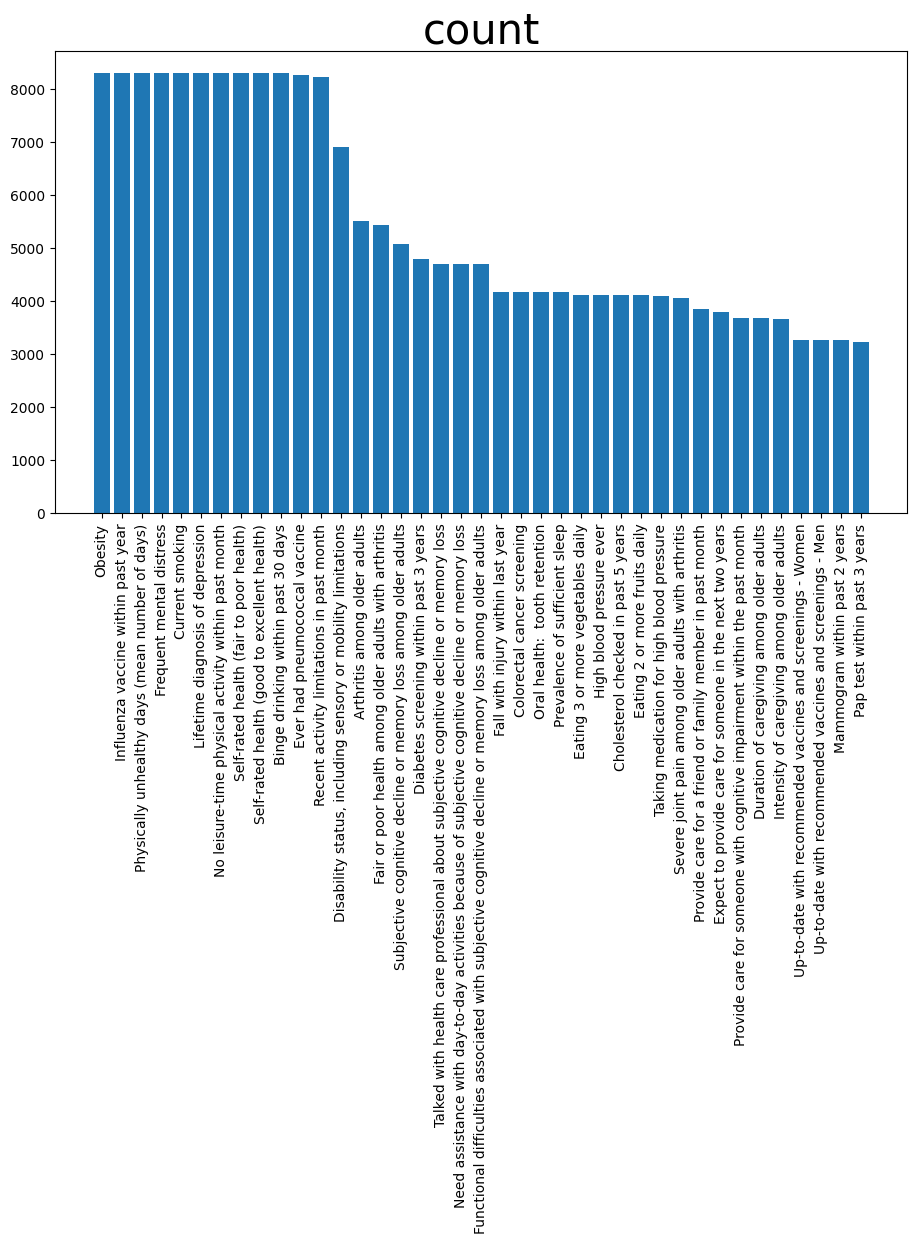

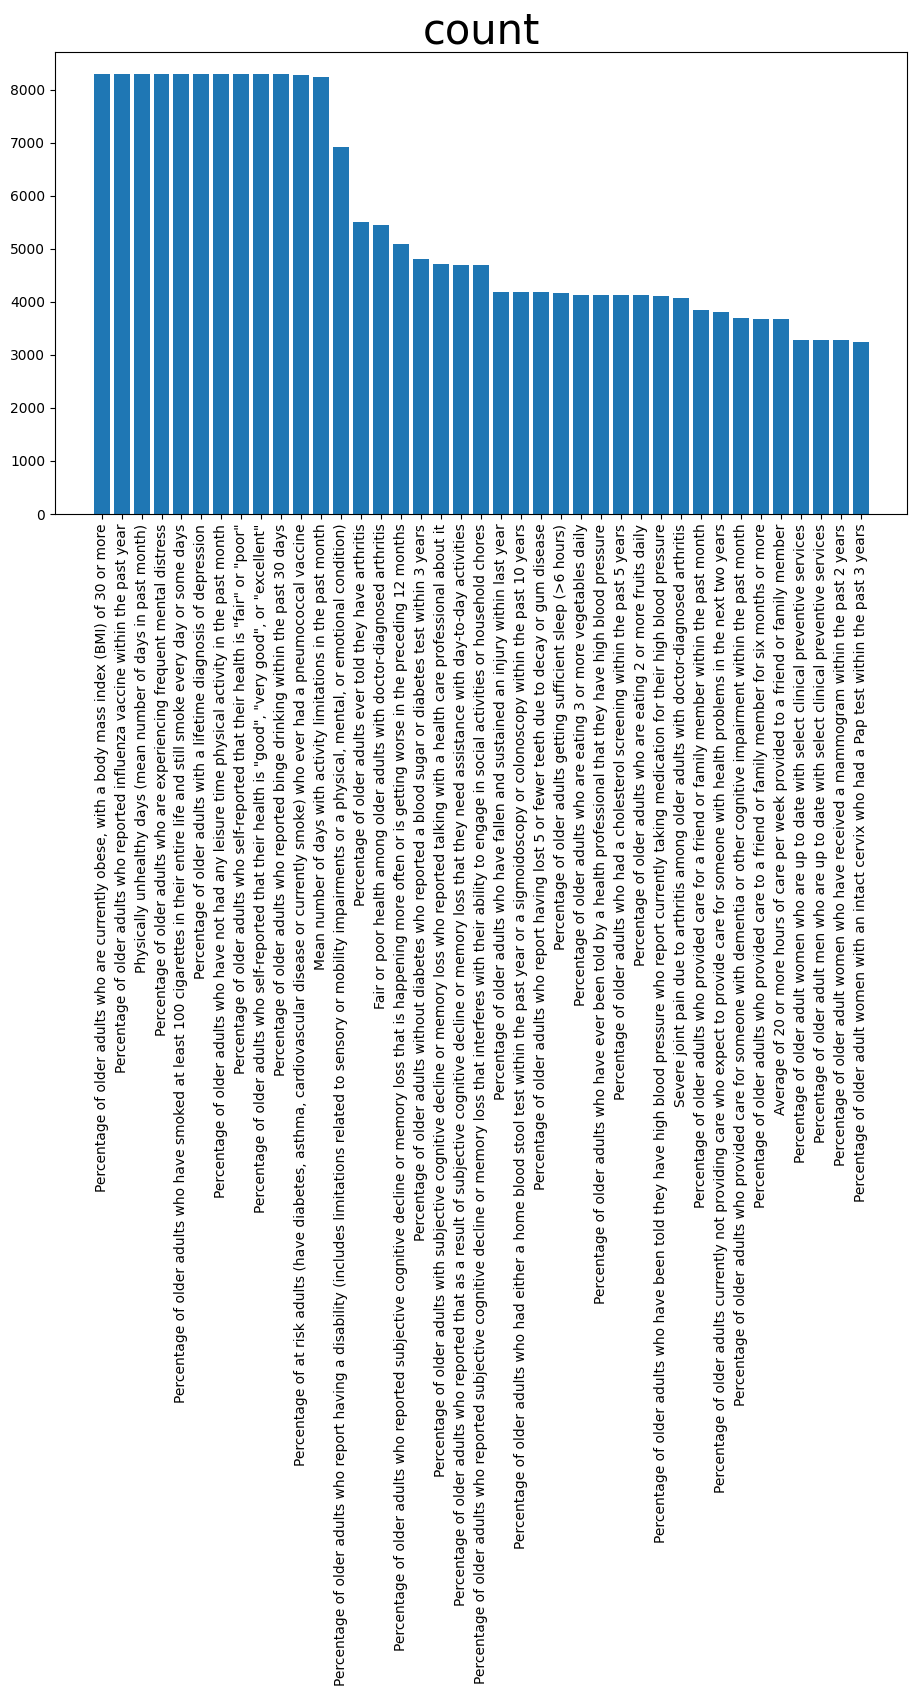

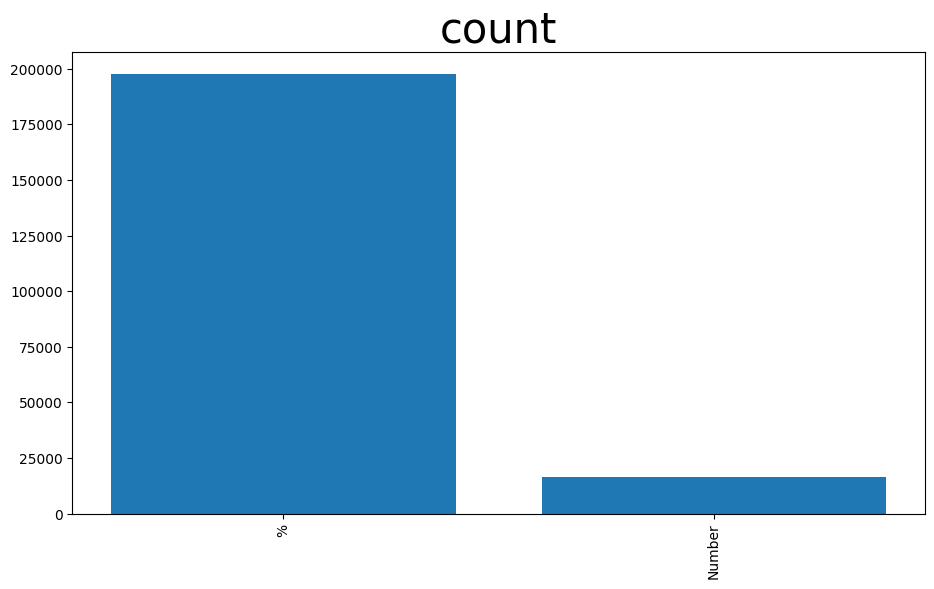

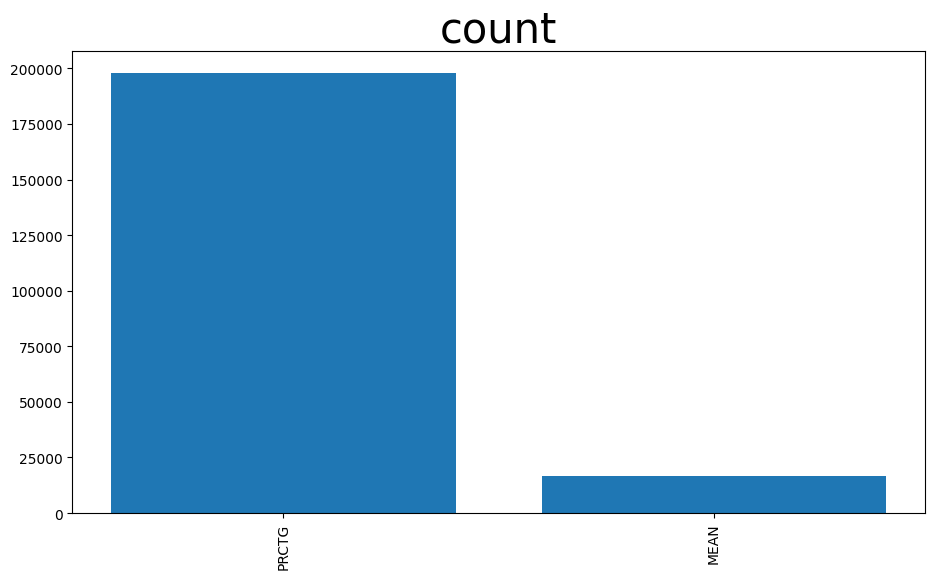

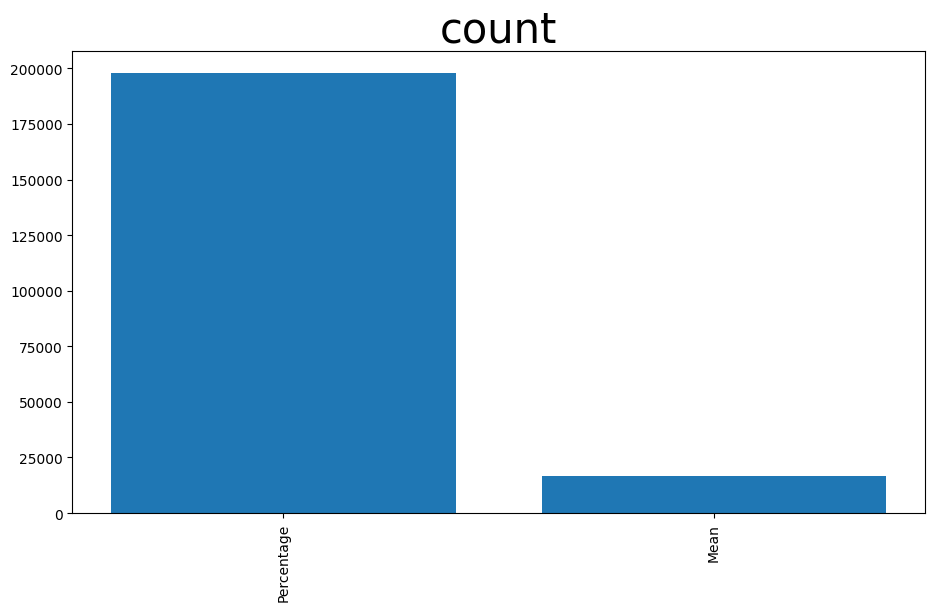

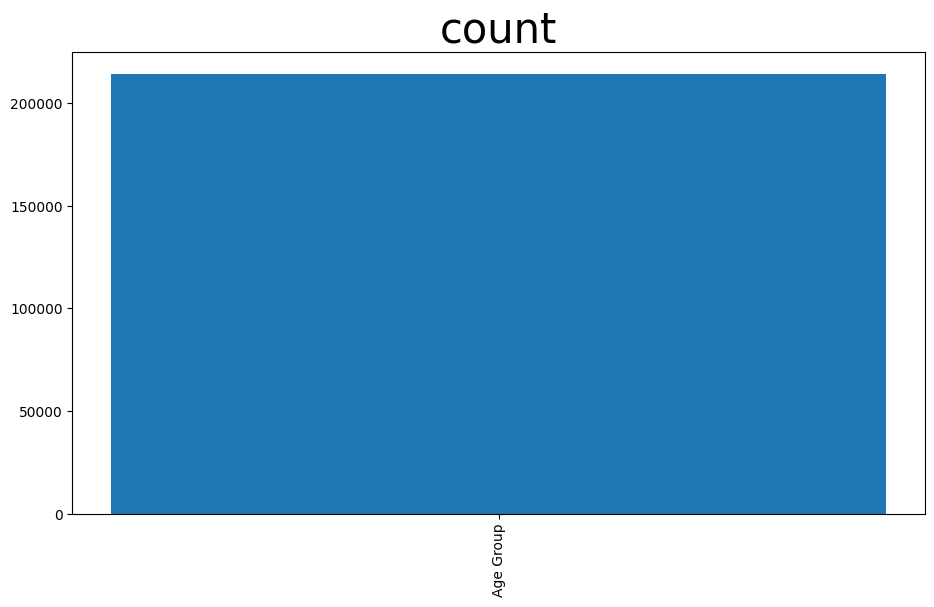

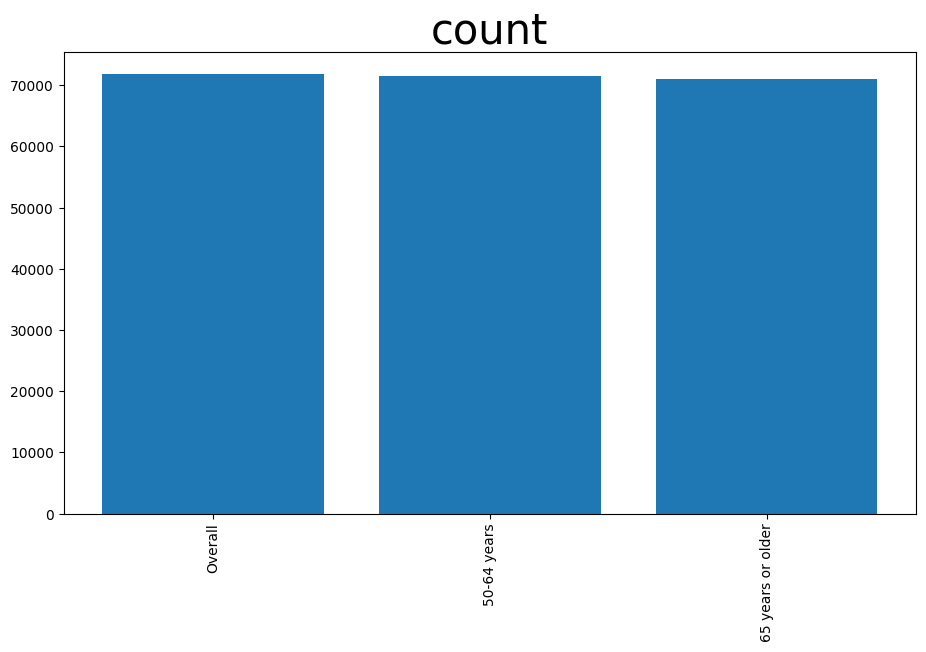

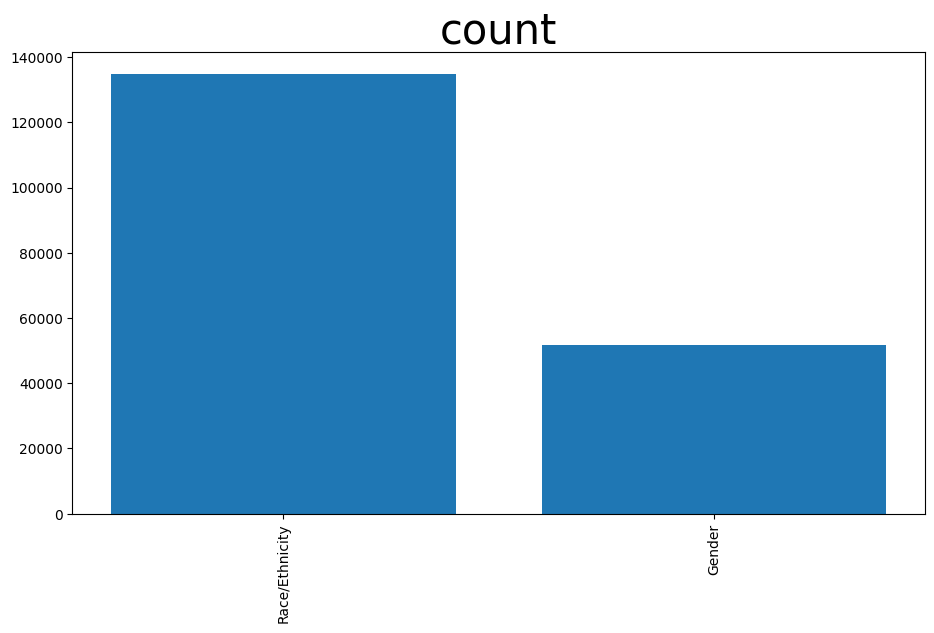

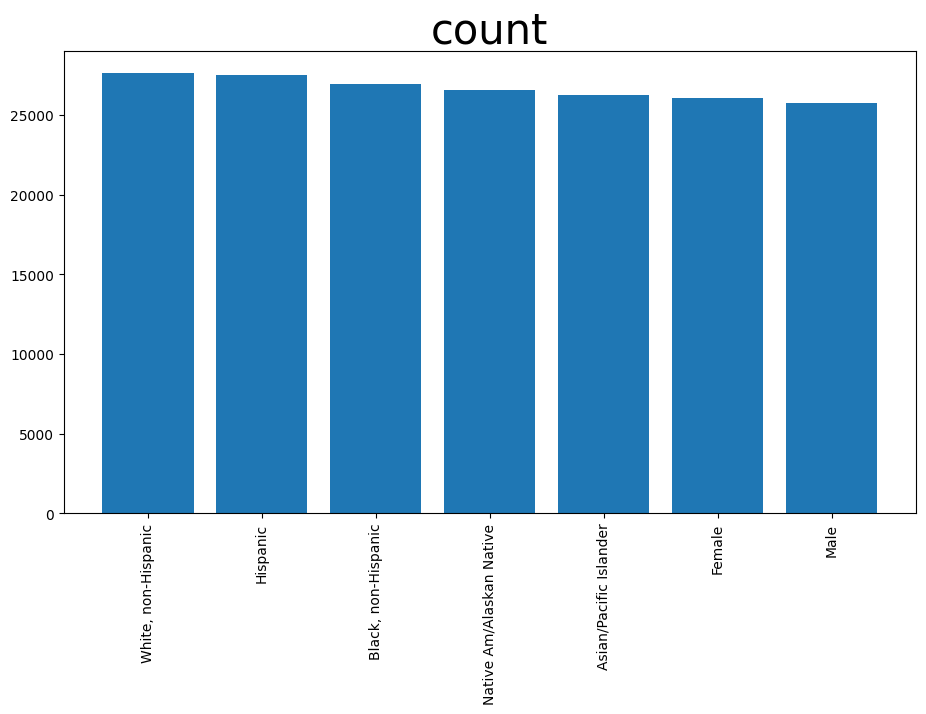

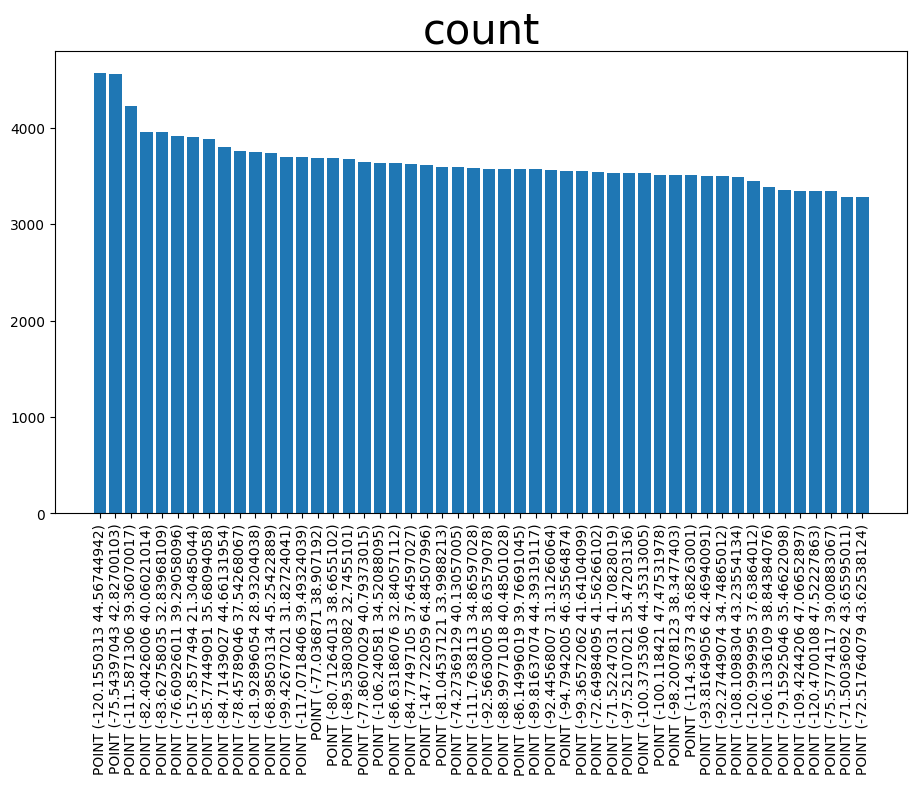

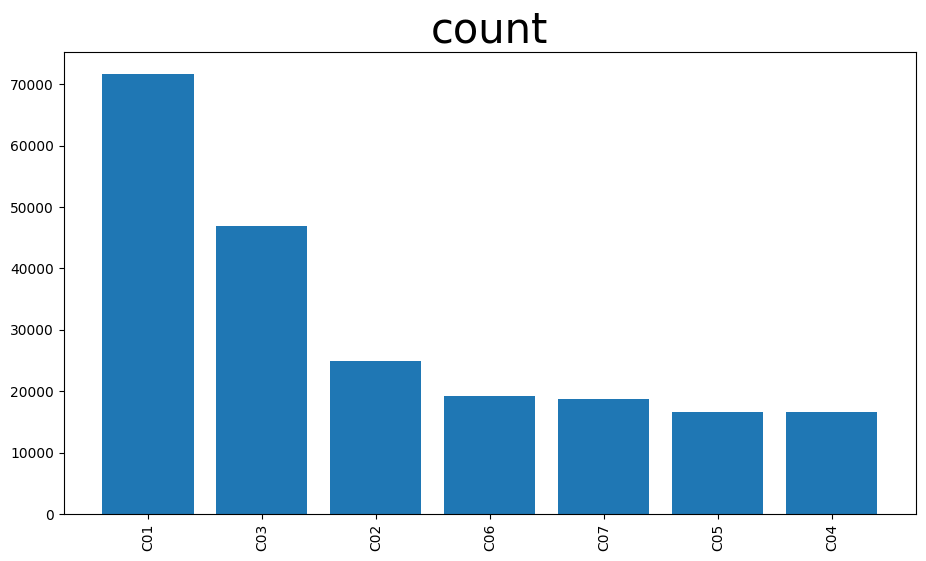

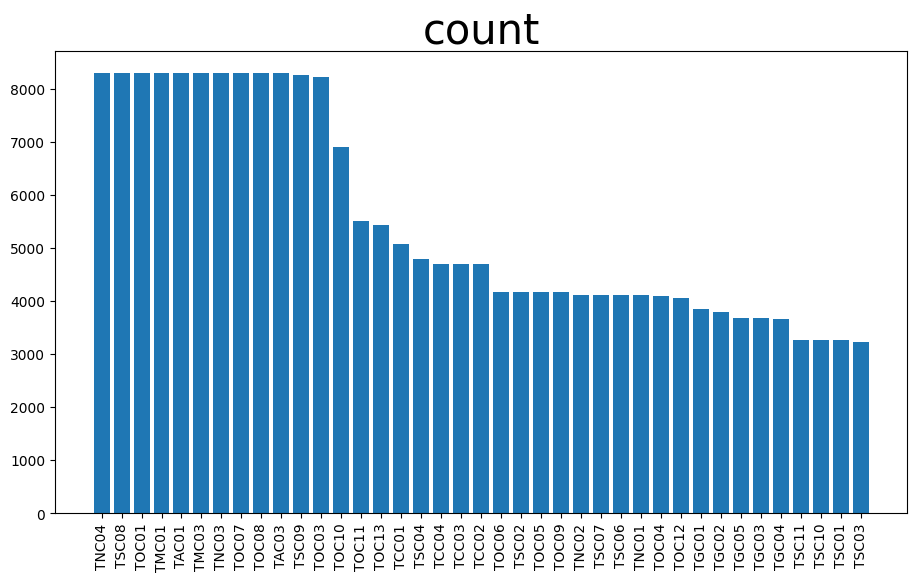

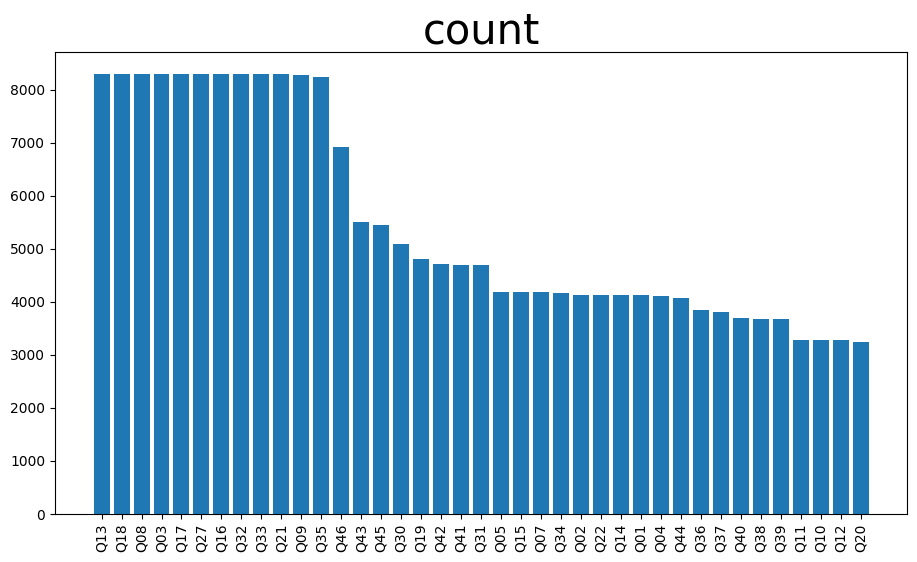

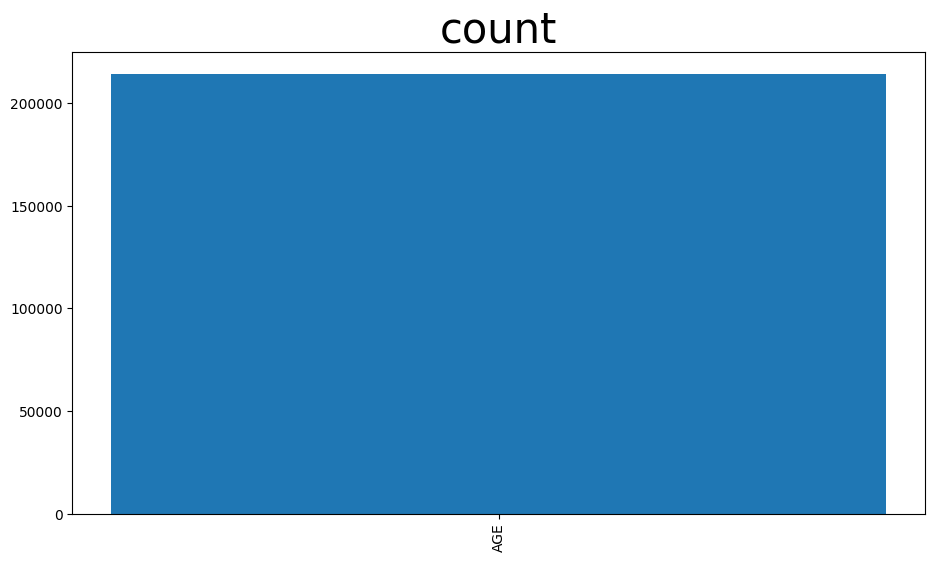

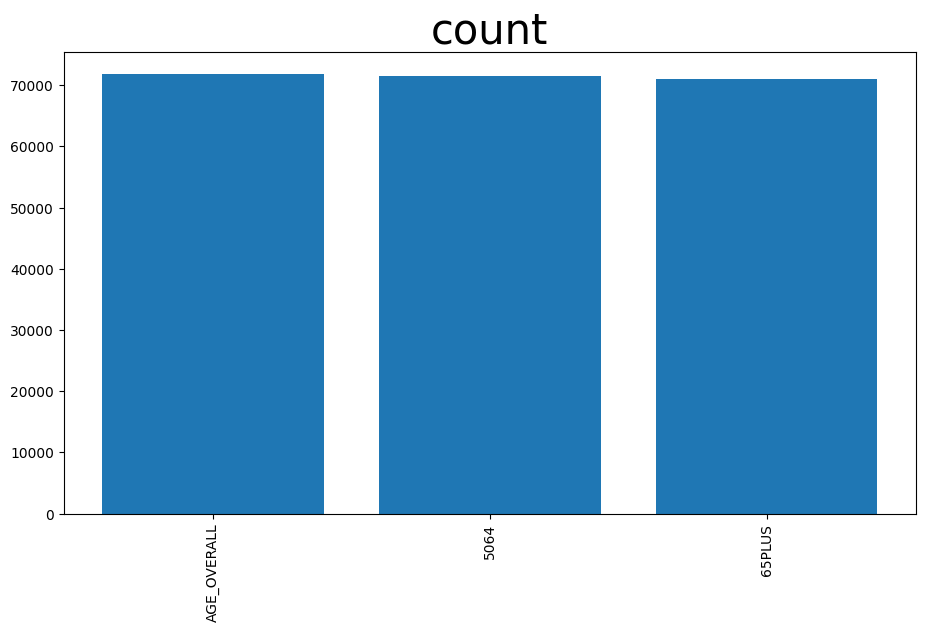

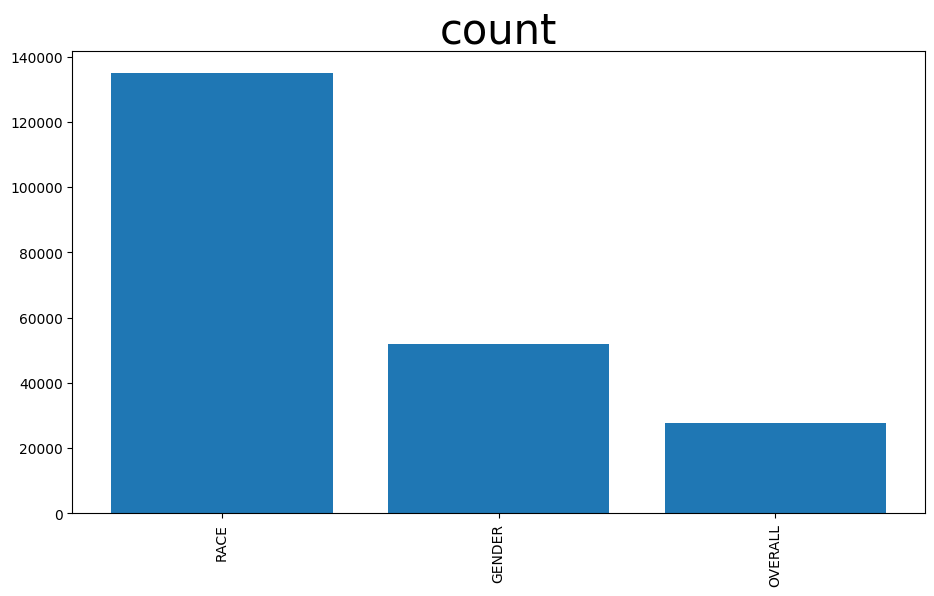

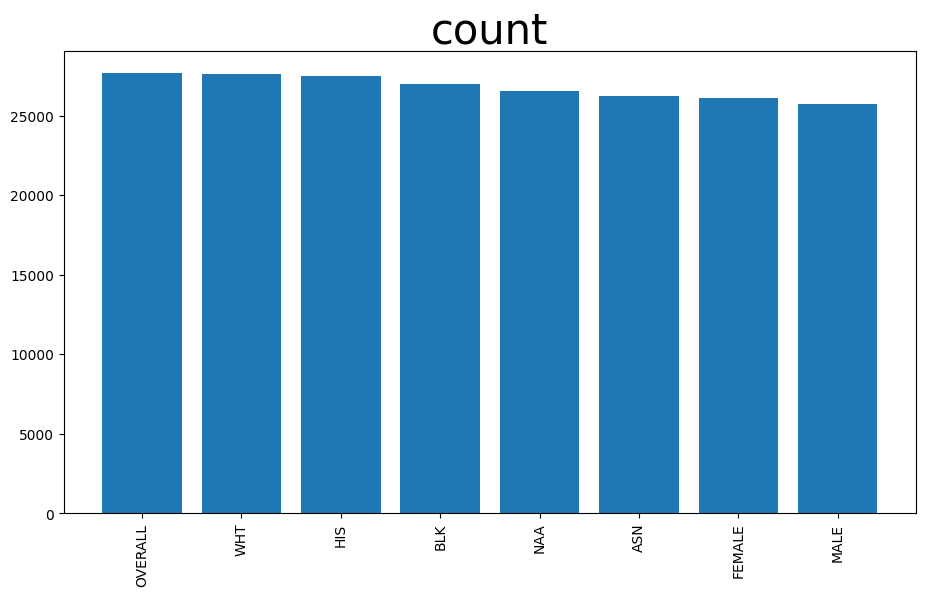

In [20]:
nominal_summary(data, nominal_index=nominal_index)

In [21]:
numerical_summary(data, numerical_index=numerical_index)

descriptive statistics (YearStart):
          Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2017.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
descriptive statistics (YearEnd):
          Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2018.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
descriptive statistics (Data_Value):
          Data: Min:  0.0000	Q1(25%):  15.3000	Q2(50%):  32.5000	Q3(75%):  56.8000	Max:  100.0000	Missing: 69833
descriptive statistics (Data_Value_Alt):
          Data: Min:  0.0000	Q1(25%):  15.3000	Q2(50%):  32.5000	Q3(75%):  56.8000	Max:  100.0000	Missing: 69833
descriptive statistics (Low_Confidence_Limit):
          Data: Min:  0.0000	Q1(25%):  12.0000	Q2(50%):  26.9000	Q3(75%):  49.1000	Max:  99.6000	Missing: 70009
descriptive statistics (High_Confidence_Limit):
          Data: Min:  1.4000	Q1(25%):  19.0000	Q2(50%):  38.5000	Q3(75%):  64.7000	Max:  100.0000	Missing: 70009
descriptive statistics (LocationID):
          Data: Min:  1.0000	Q1

In [22]:
def remove_missing_parts(df: pd.DataFrame):
    '''将缺失部分剔除'''
    return df.dropna(axis=0)


def fill_in_missing_values_with_the_highest_frequency_value(df: pd.DataFrame):
    '''用最高频率值来填补缺失值'''
    cpdf = df.copy(deep=True)
    for key in cpdf.columns:
        cpdf[key].fillna(cpdf[key].mode()[0], inplace=True)
    return cpdf


def fill_in_missing_values_through_attribute_correlation(df: pd.DataFrame, miss_index, complete_index):
    '''通过属性的相关关系来填补缺失值'''
    
    def set_miss_values(df: pd.DataFrame, complete_index):
        enc_label = OrdinalEncoder()
        enc_feature = OrdinalEncoder()
        missing_index = complete_index[0]
        train_df = df[complete_index]

        known_values = np.array(train_df[train_df[missing_index].notnull()])
        unknow_values = np.array(train_df[train_df[missing_index].isnull()])
 
        y = known_values[:, 0].reshape(-1, 1)
        enc_label.fit(y)
        y = enc_label.transform(y)

        X = known_values[:, 1:]
        test_X = unknow_values[:, 1:]
        all_X = np.row_stack((X, test_X))
        enc_feature.fit(all_X)
        X = enc_feature.transform(X)

        rfr = RandomForestRegressor(random_state=0, n_estimators=20, n_jobs=10)
        rfr.fit(X, y.ravel())

        predicted_values = rfr.predict(enc_feature.transform(unknow_values[:, 1:]))
        predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))

        df.loc[(df[missing_index].isnull()), missing_index] = predicted_values
        return df
    
    cpdf = df.copy(deep=True)
    for i in range(0, len(miss_index)):
        complete_index.insert(0, miss_index[i])
        cpdf = set_miss_values(cpdf, complete_index)
    return cpdf


def fill_in_missing_values_through_similarity_between_data_objects(df: pd.DataFrame, numerical_index, k=30):
    '''通过数据对象之间的相似性来填补缺失值'''
    cpdf = df.copy(deep=True)
    imputed_training = fast_knn(cpdf[numerical_index].values, k=k)
    imputed_training = pd.DataFrame(data=imputed_training, columns=numerical_index)
    cpdf[numerical_index] = imputed_training[numerical_index]
    return cpdf

In [23]:
new_data = remove_missing_parts(data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97238 entries, 4 to 214454
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  97238 non-null  int64  
 1   YearEnd                    97238 non-null  int64  
 2   LocationAbbr               97238 non-null  object 
 3   LocationDesc               97238 non-null  object 
 4   Datasource                 97238 non-null  object 
 5   Class                      97238 non-null  object 
 6   Topic                      97238 non-null  object 
 7   Question                   97238 non-null  object 
 8   Data_Value_Unit            97238 non-null  object 
 9   DataValueTypeID            97238 non-null  object 
 10  Data_Value_Type            97238 non-null  object 
 11  Data_Value                 97238 non-null  float64
 12  Data_Value_Alt             97238 non-null  float64
 13  Low_Confidence_Limit       97238 non-null  float64

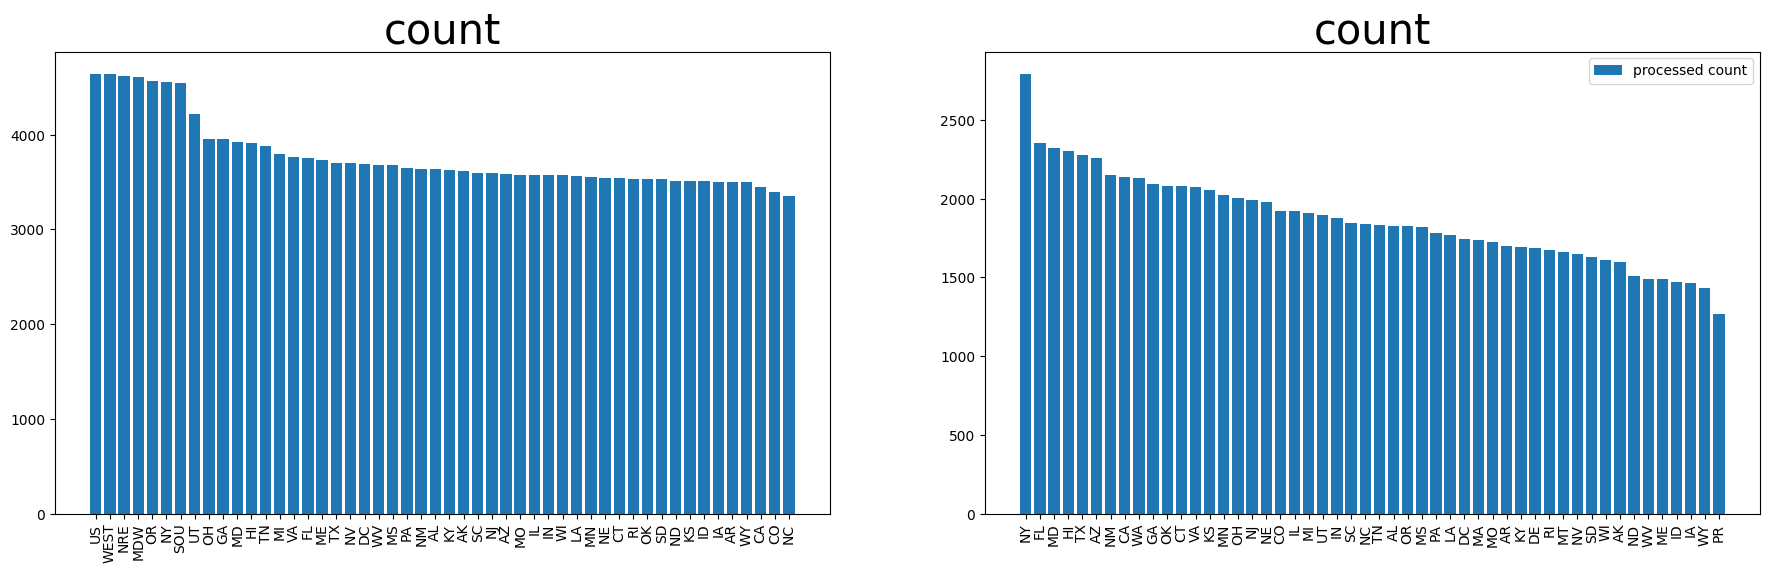

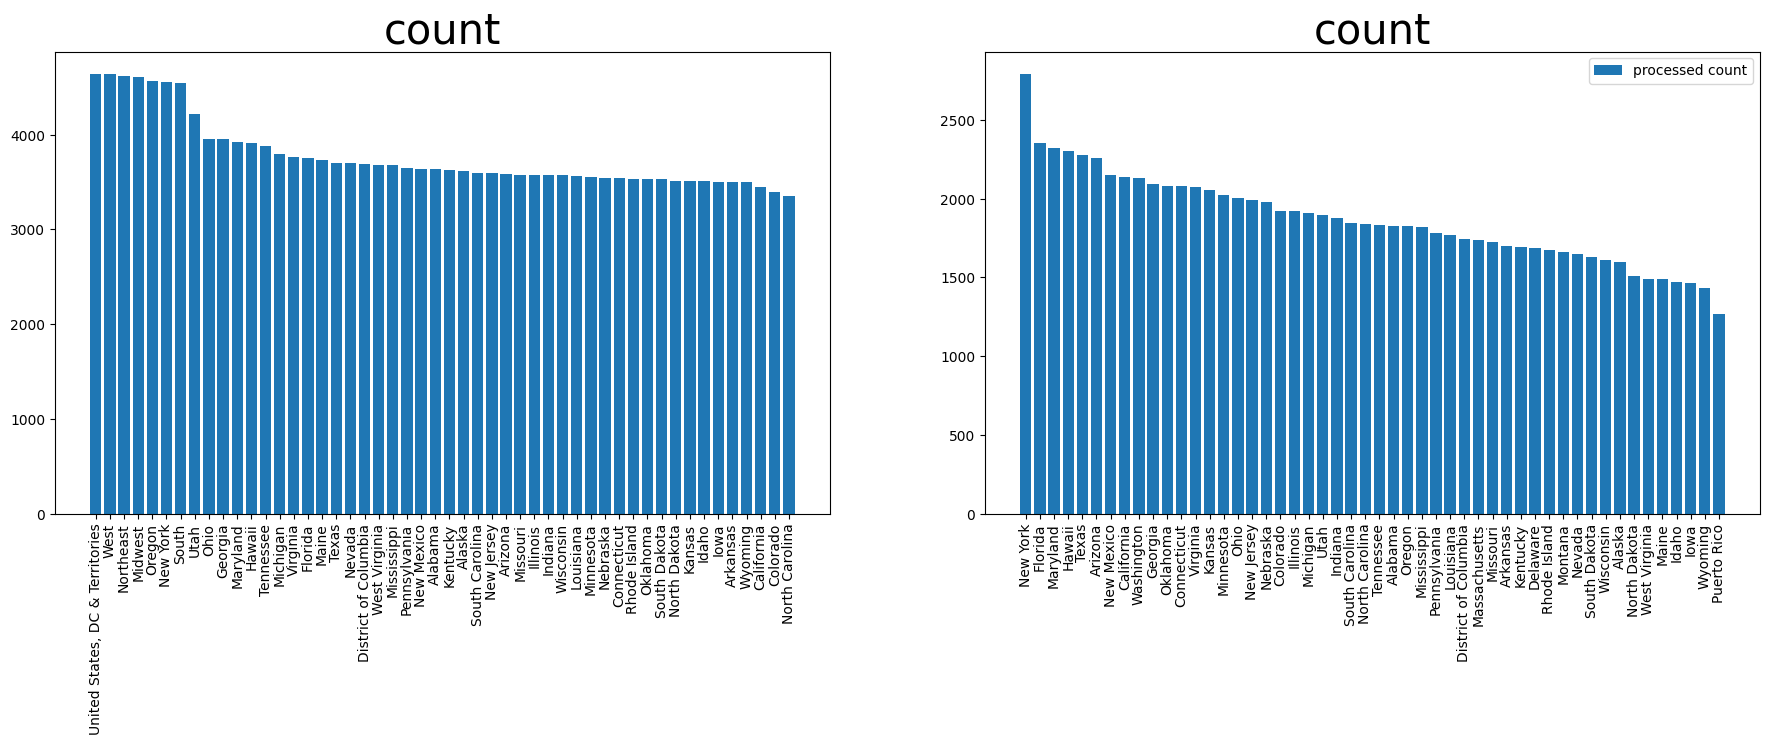

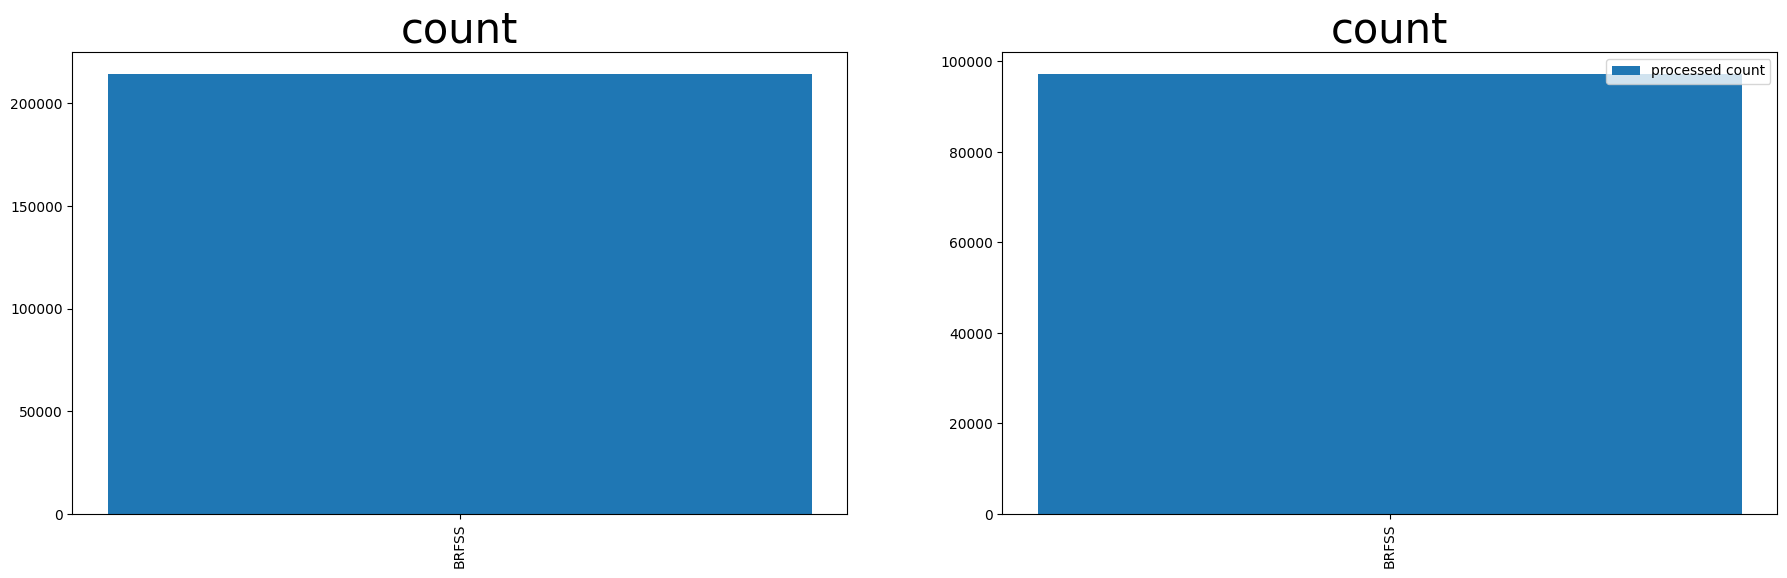

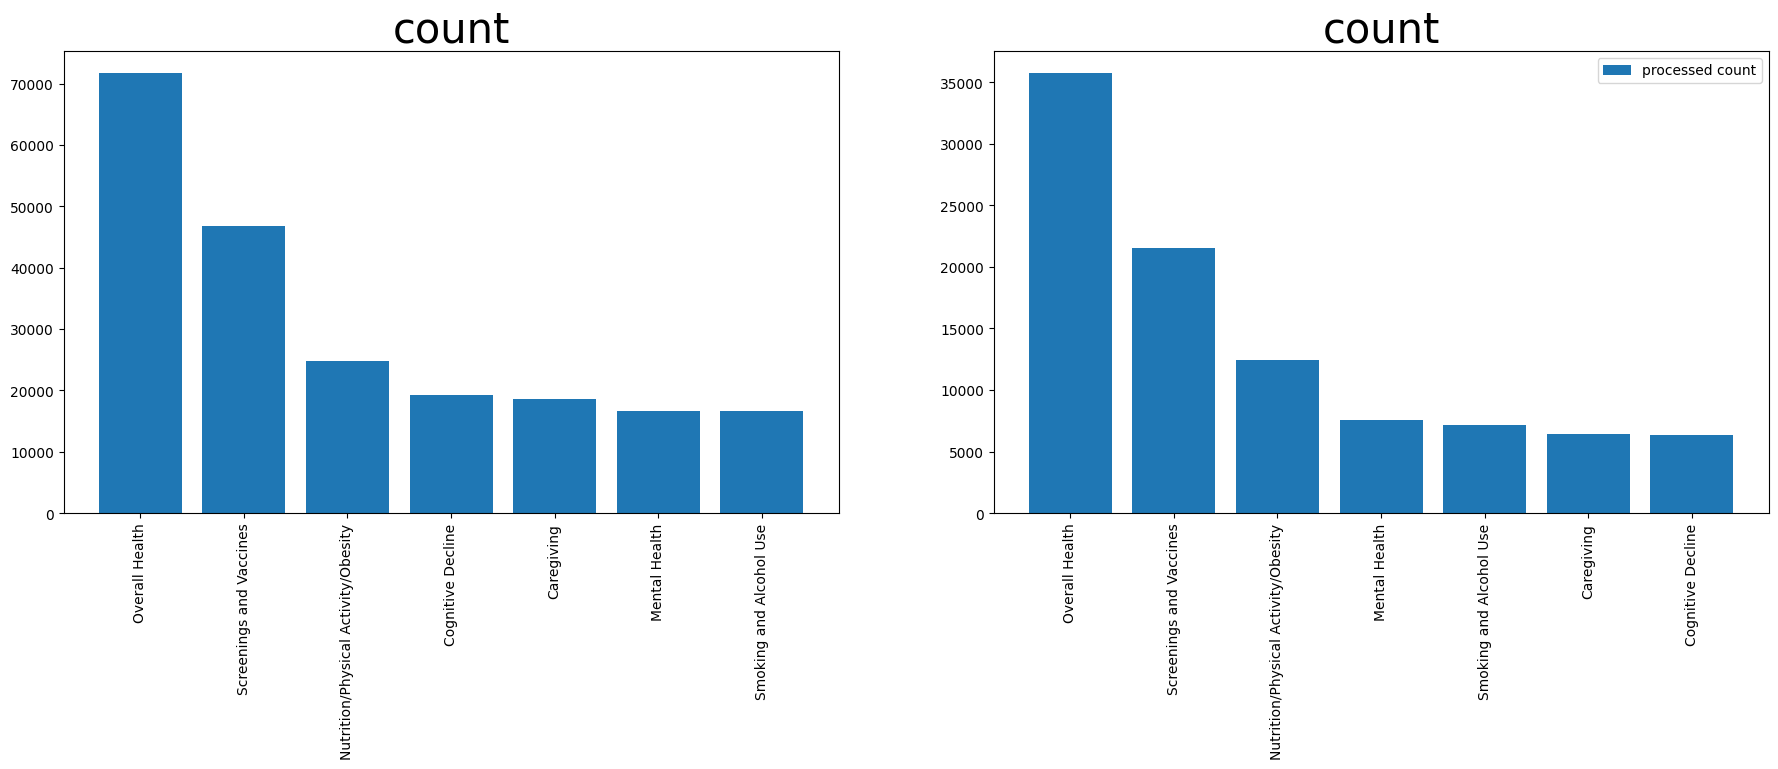

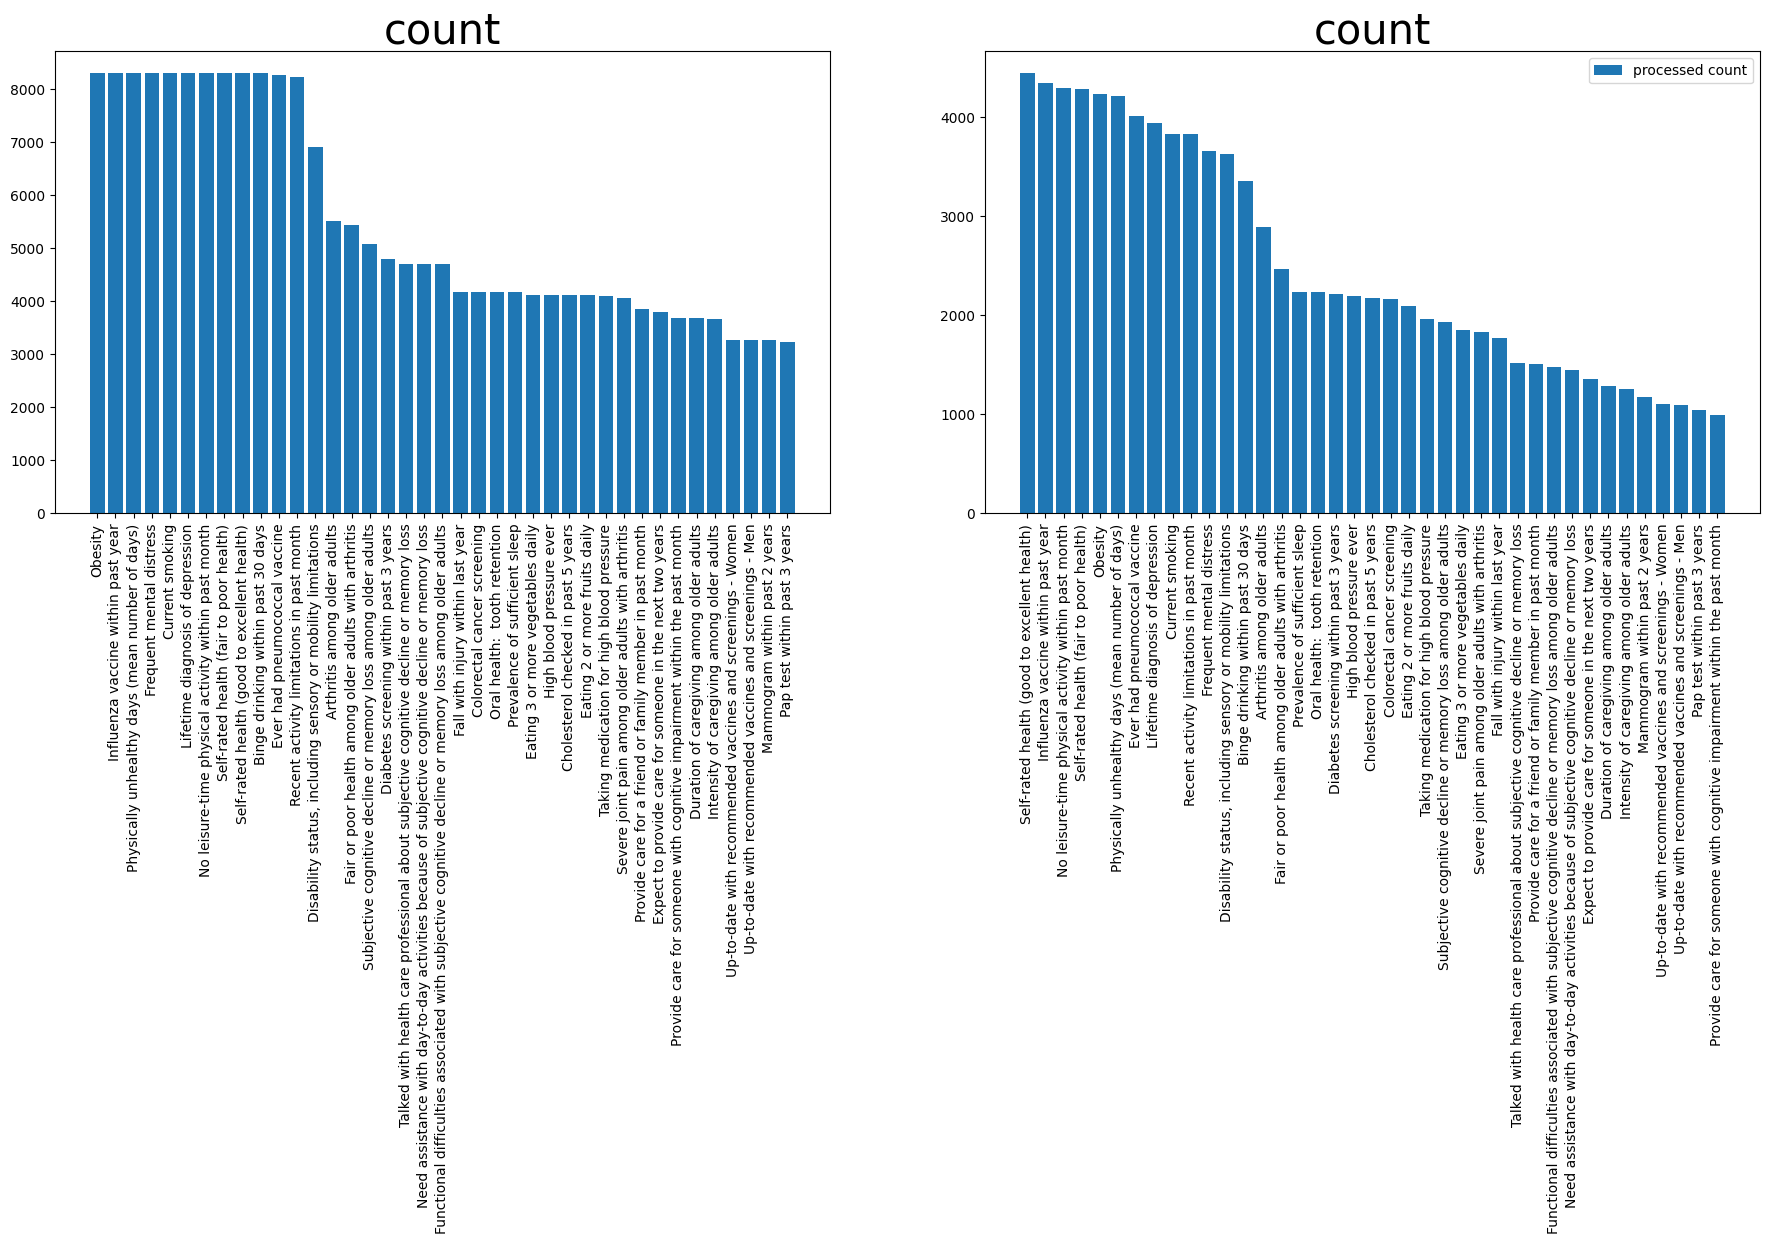

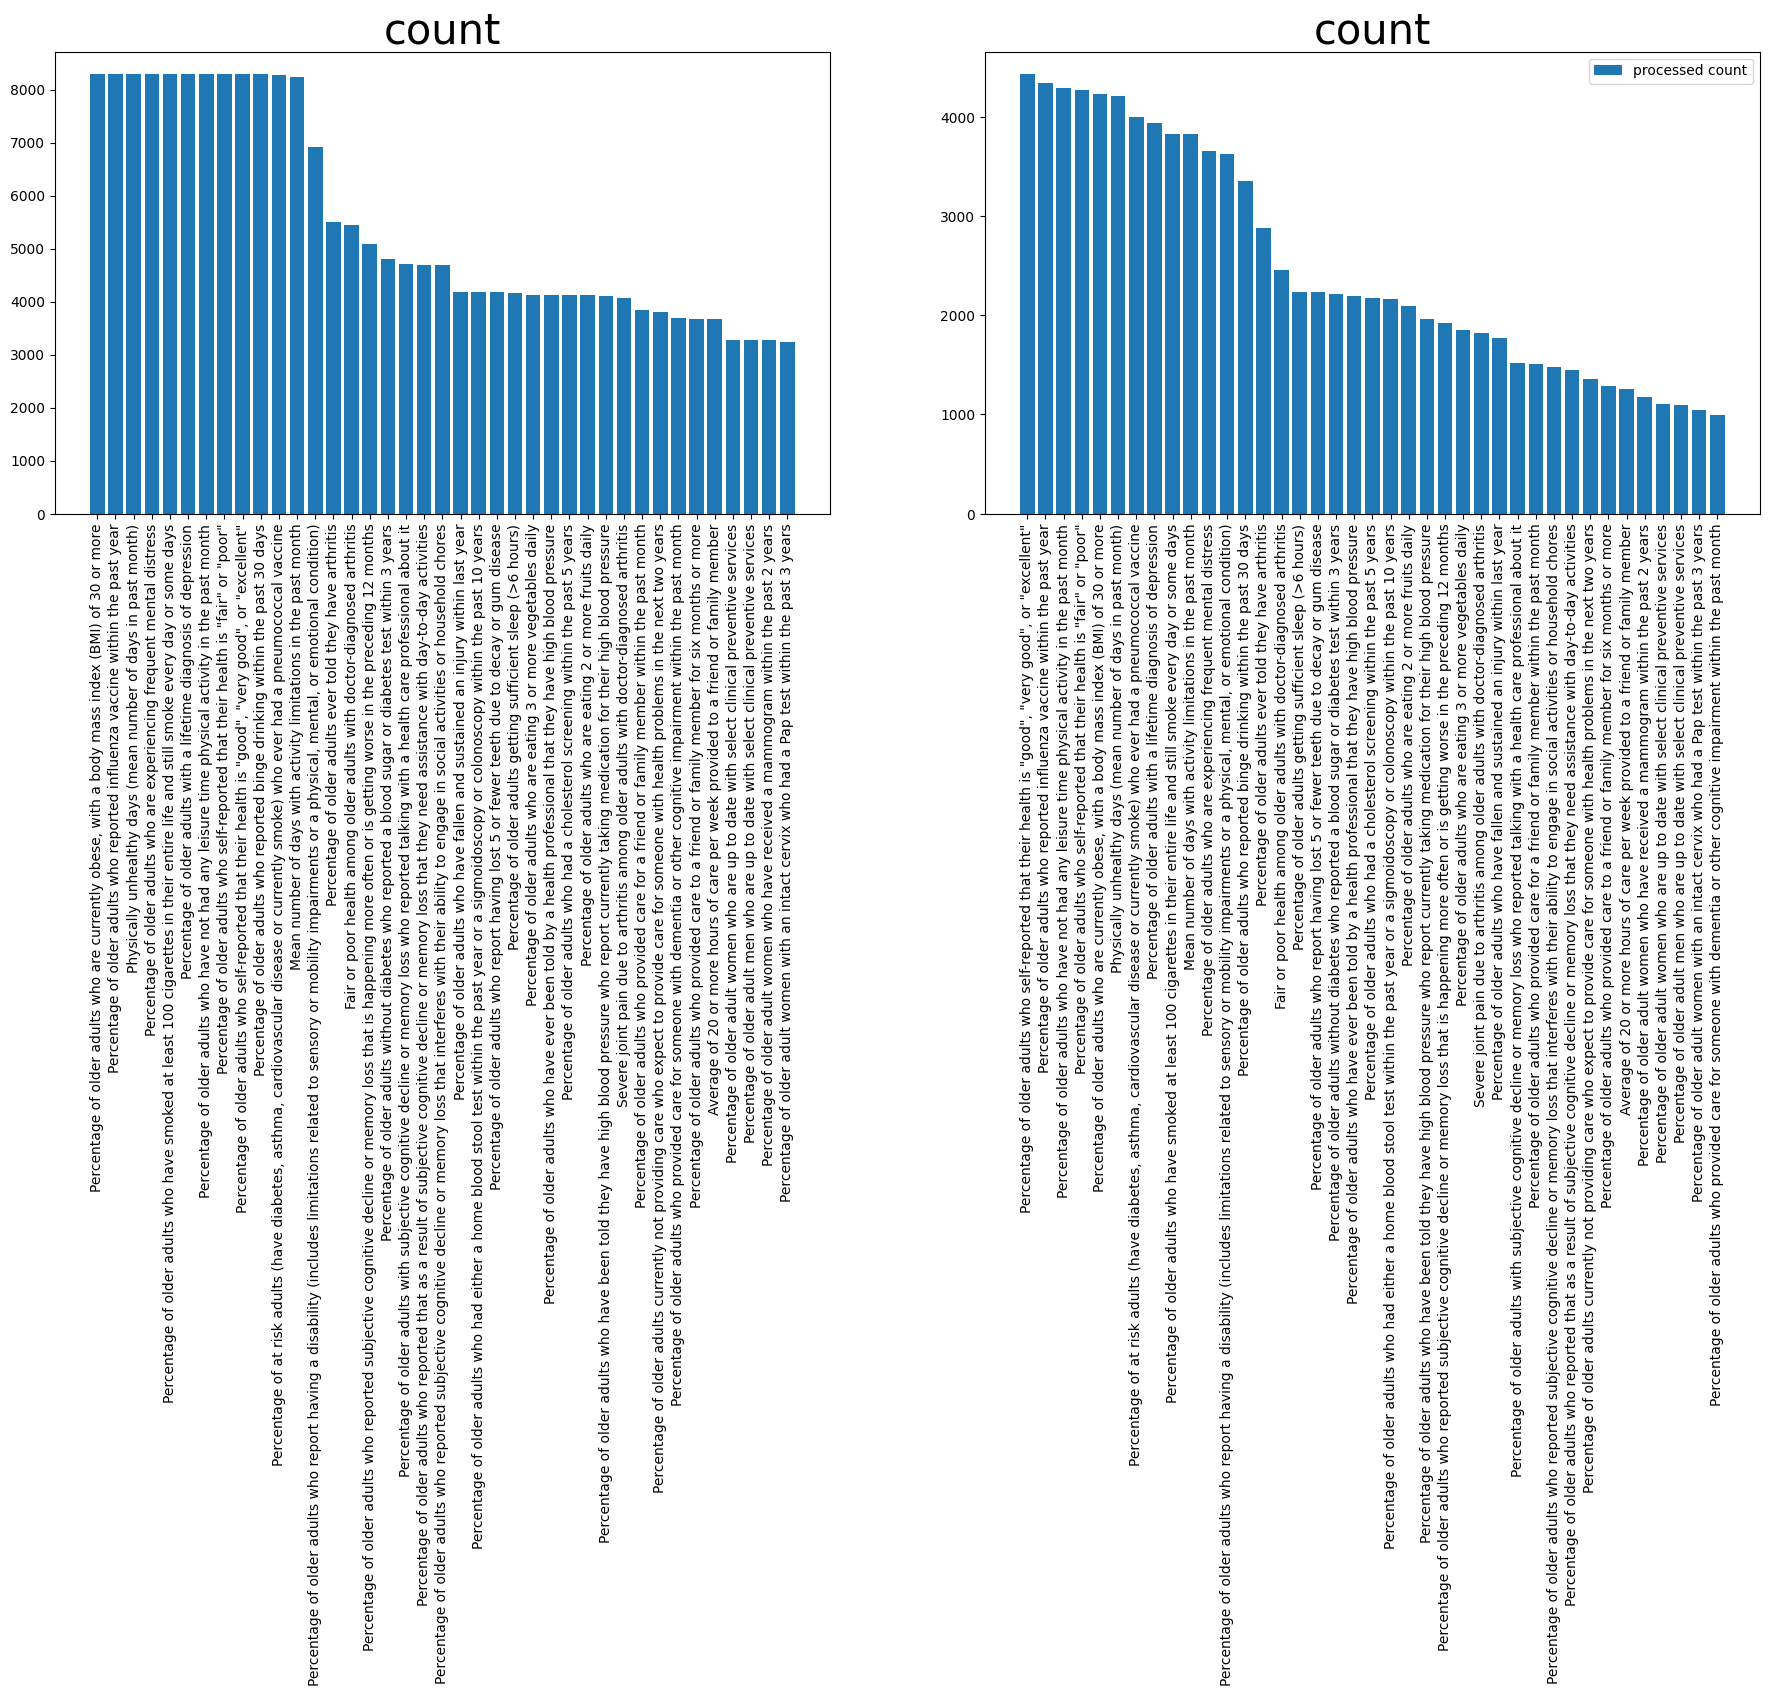

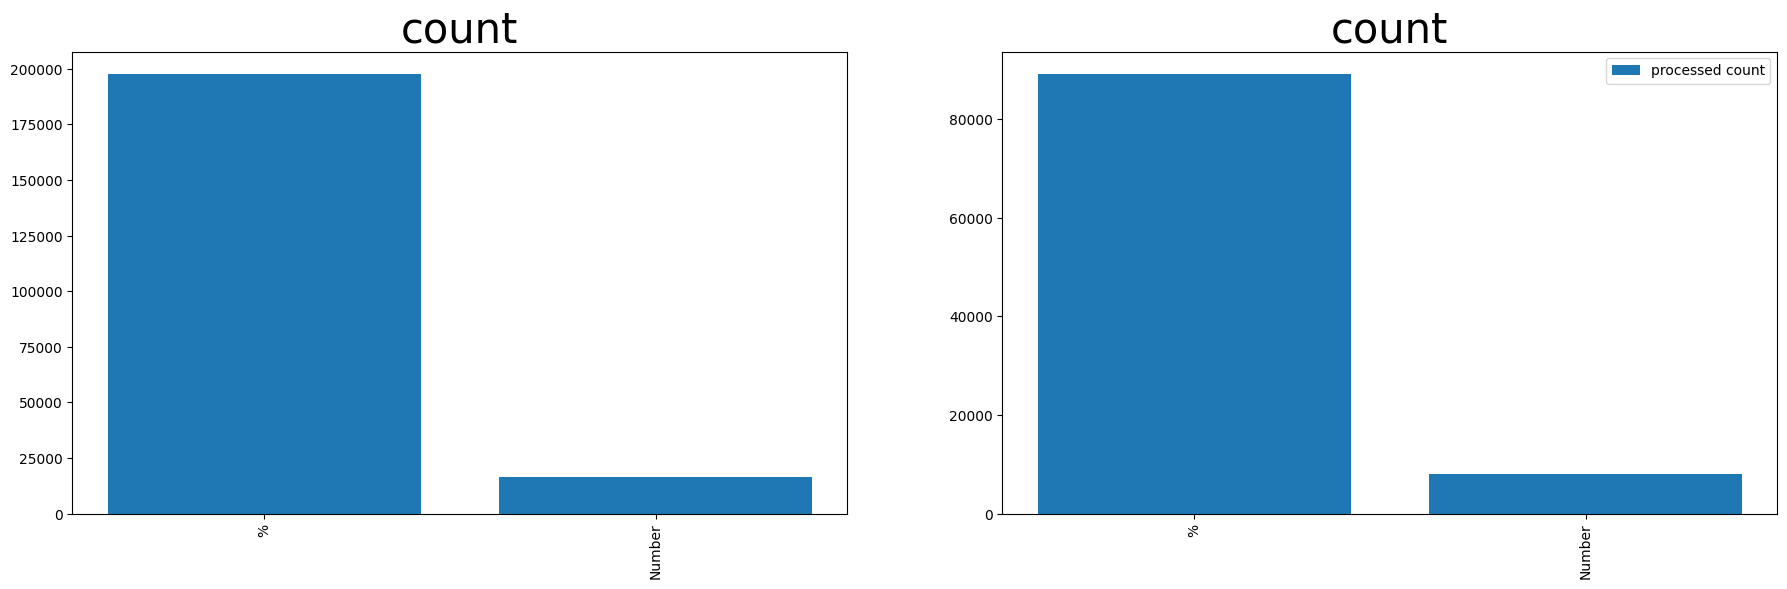

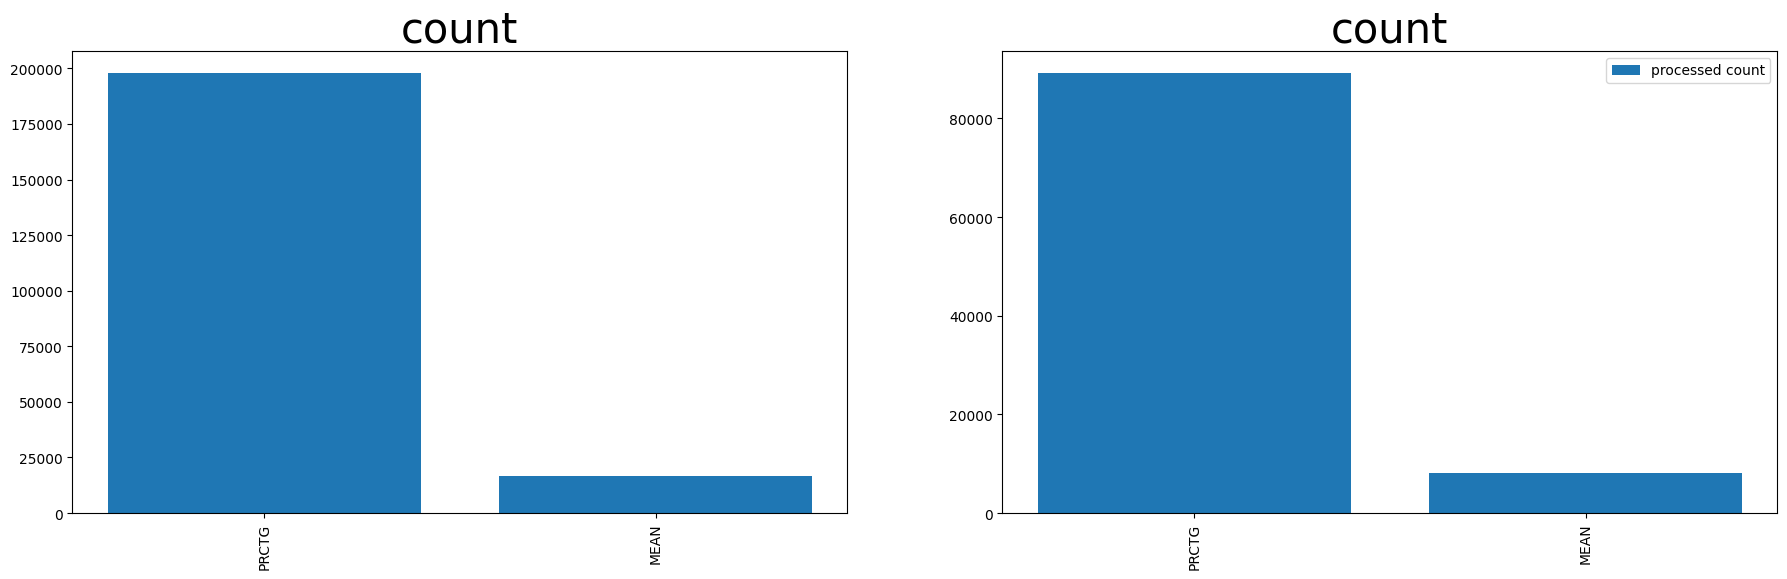

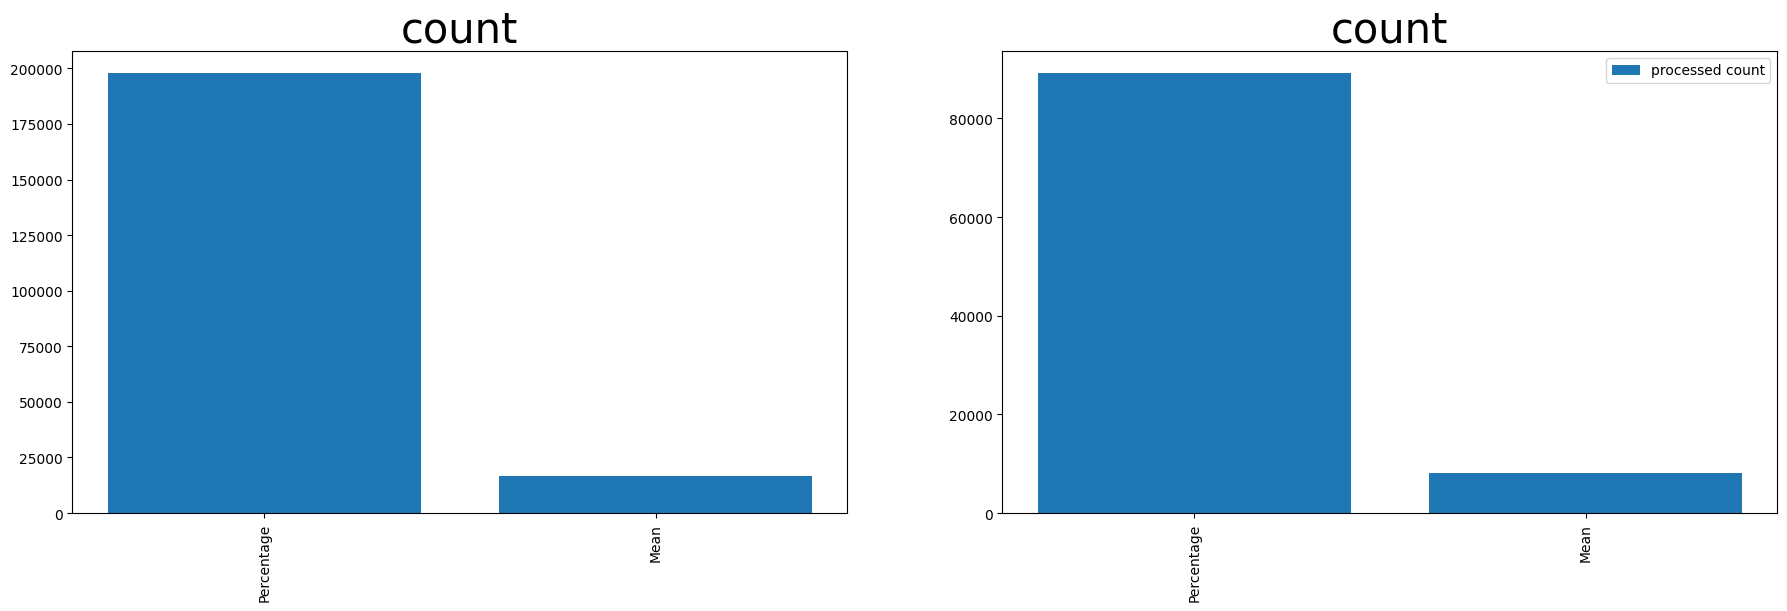

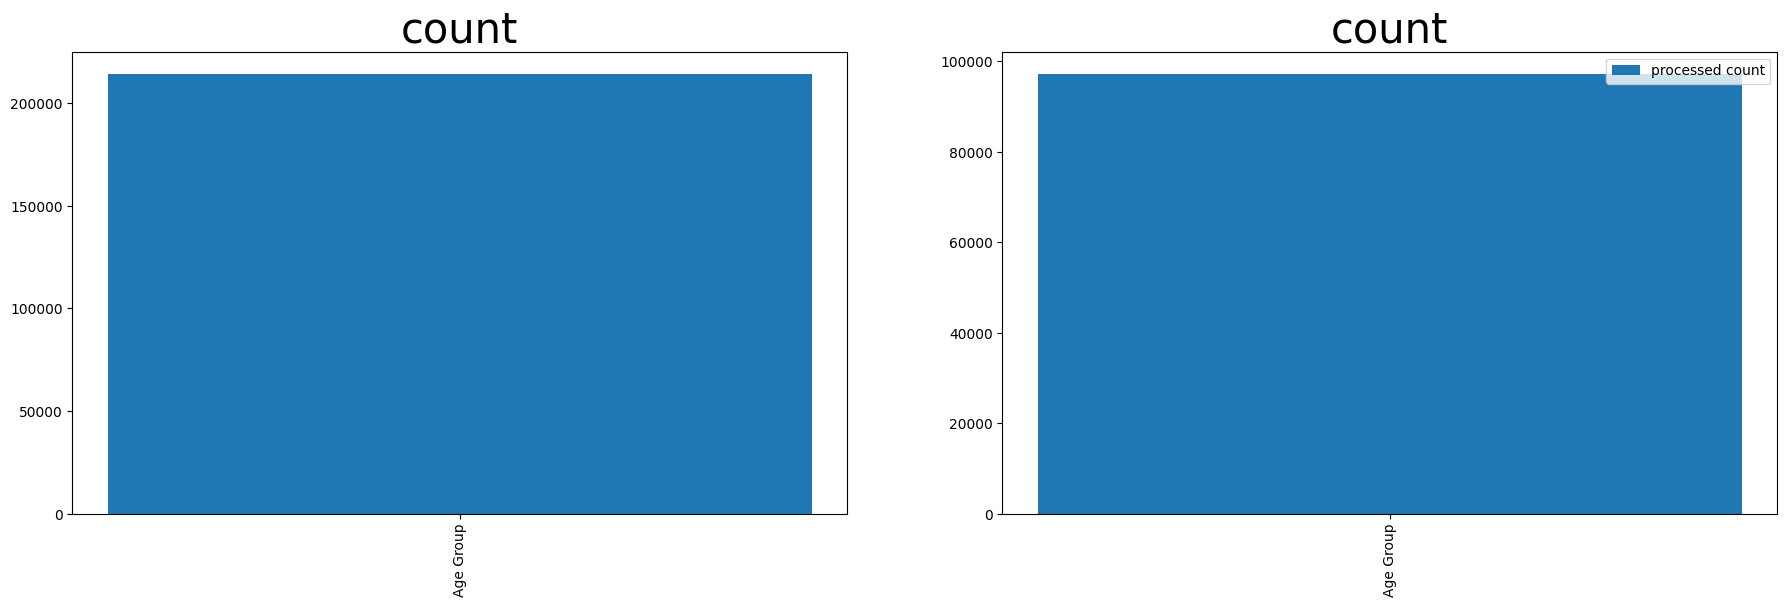

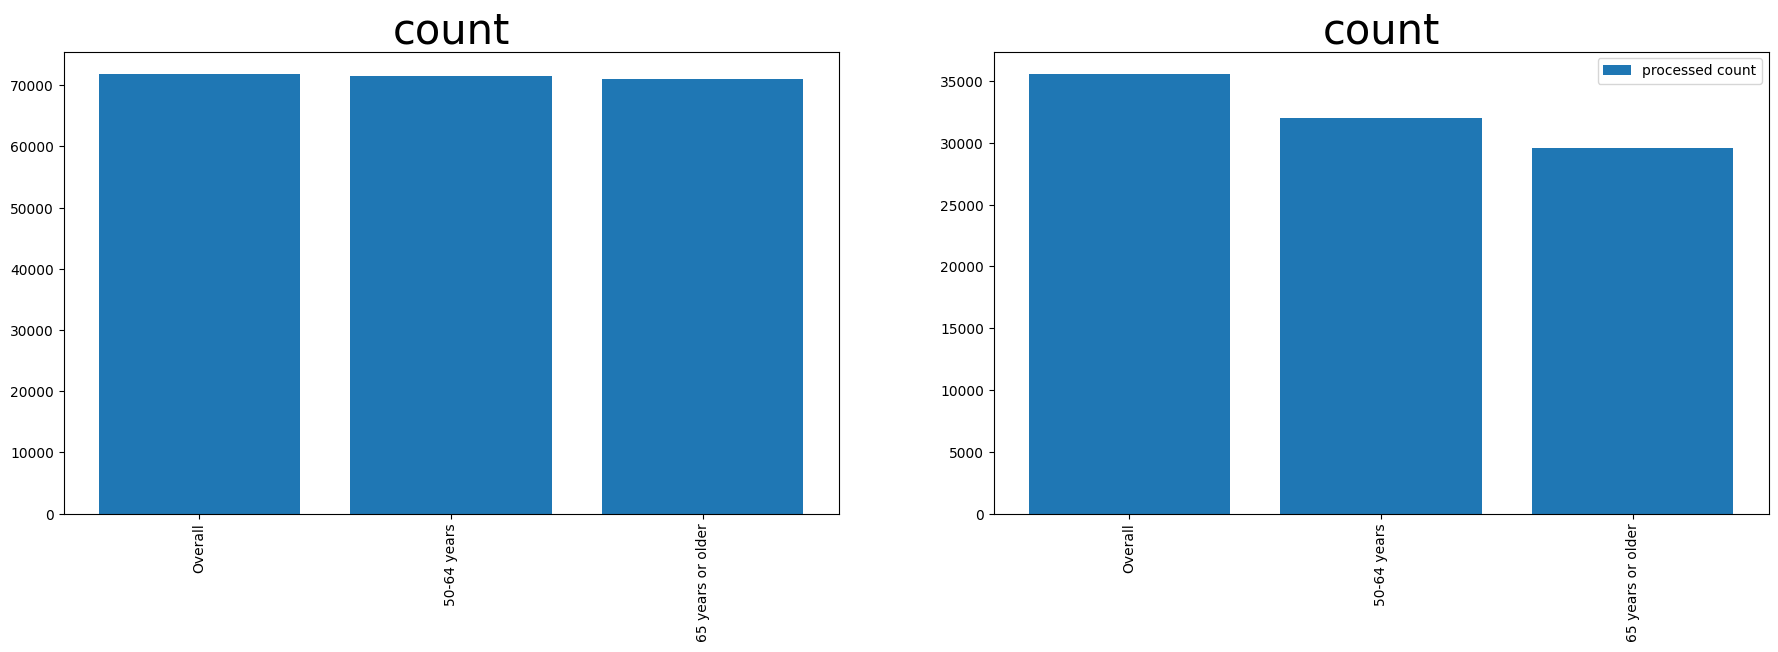

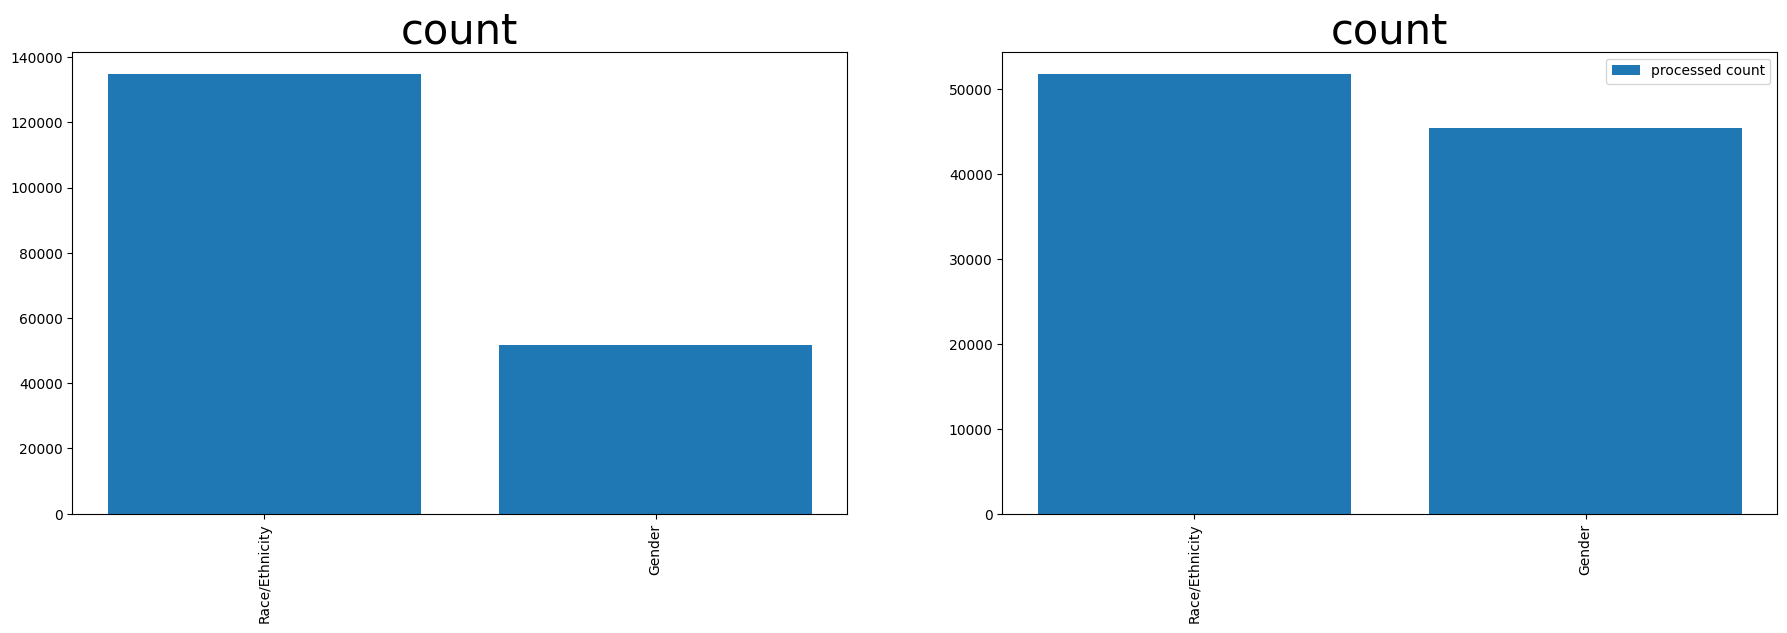

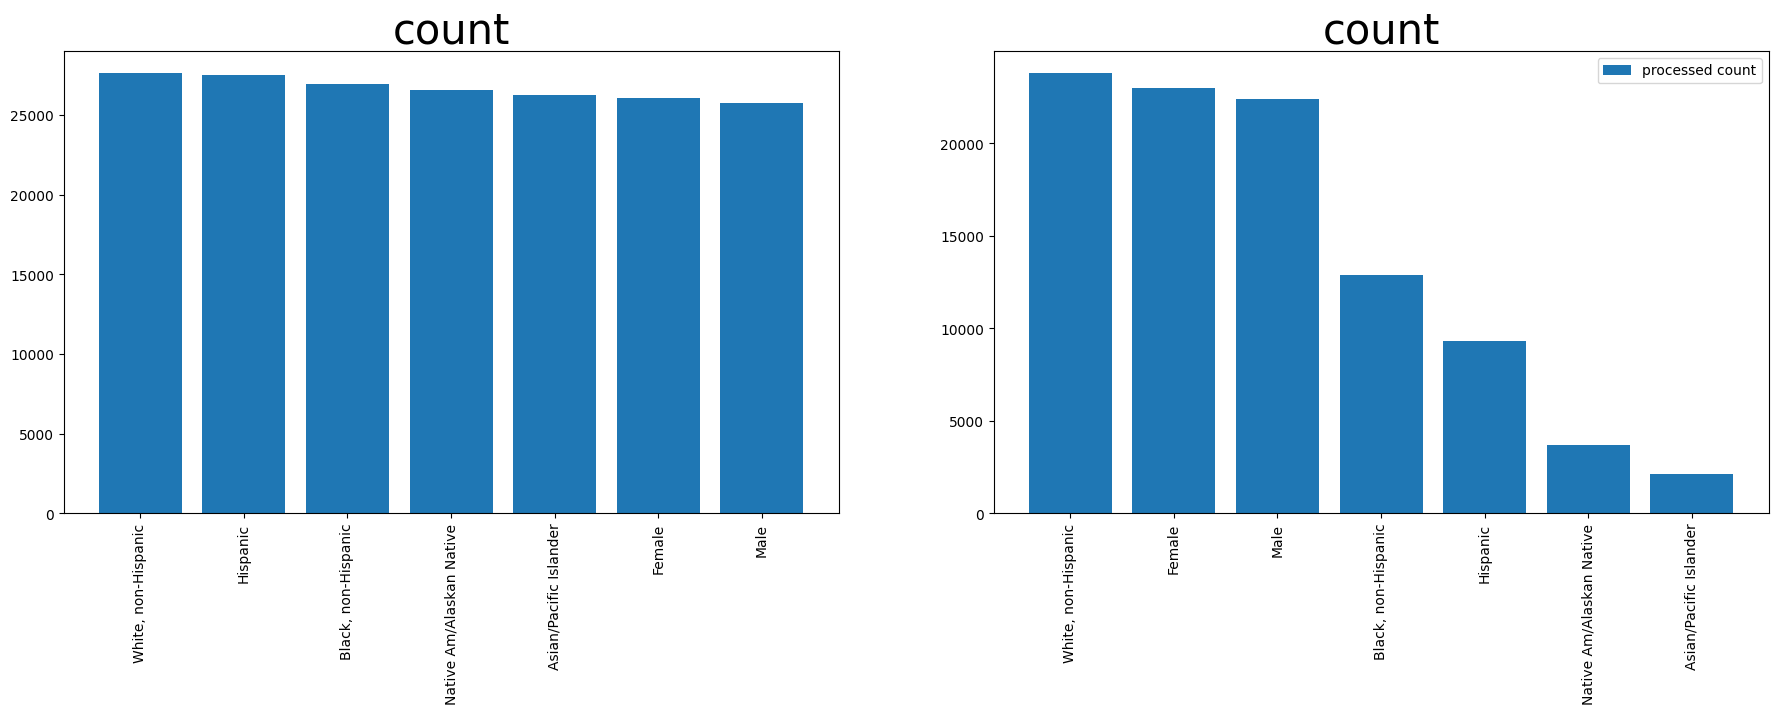

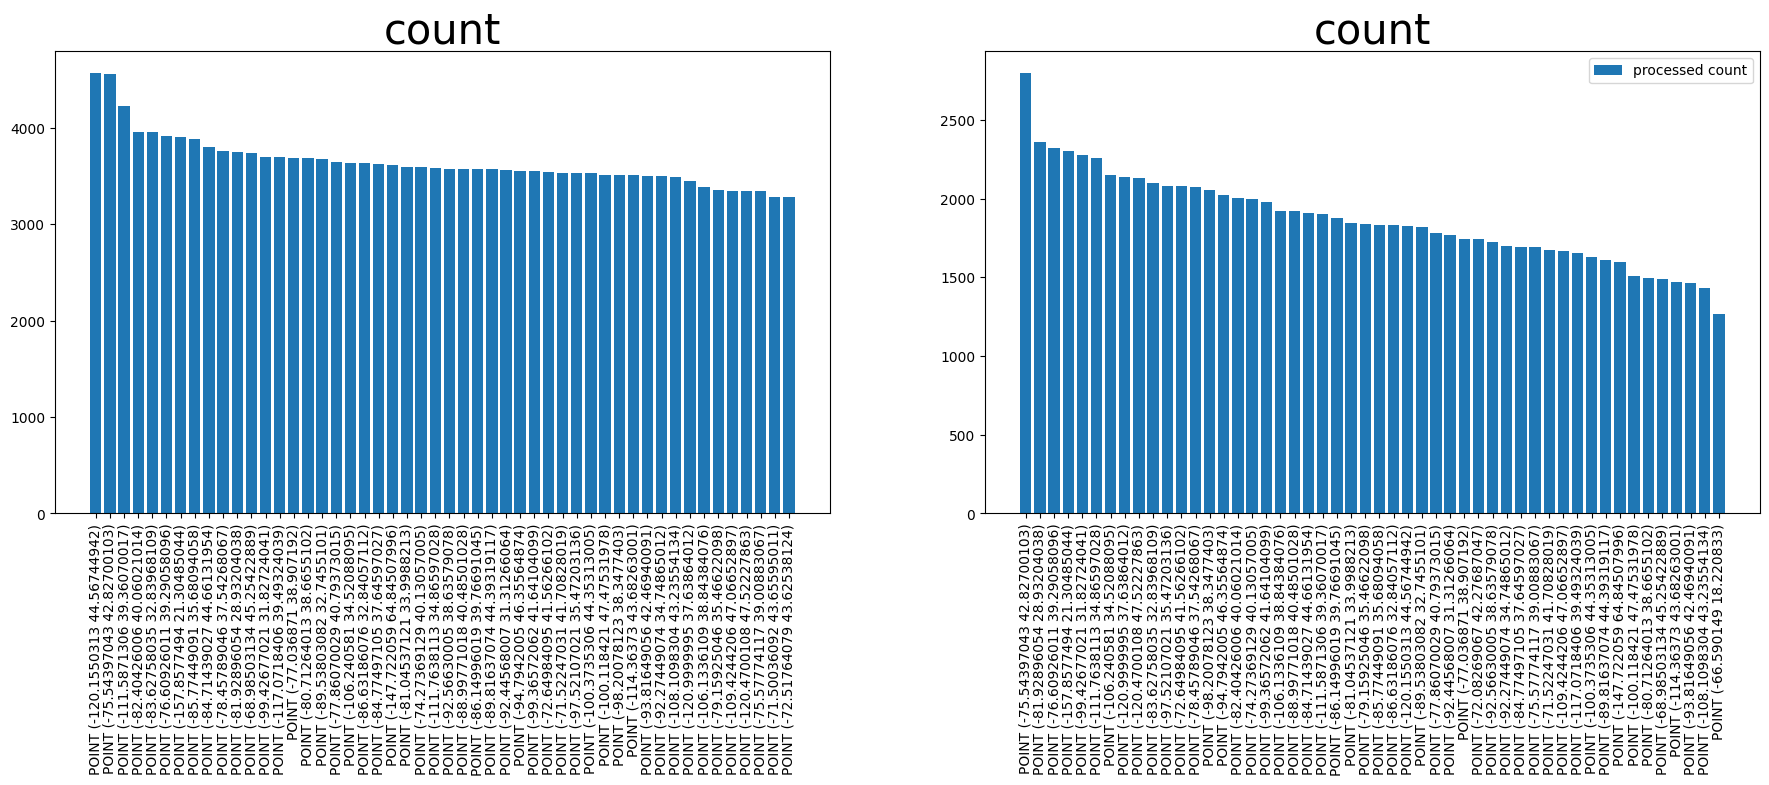

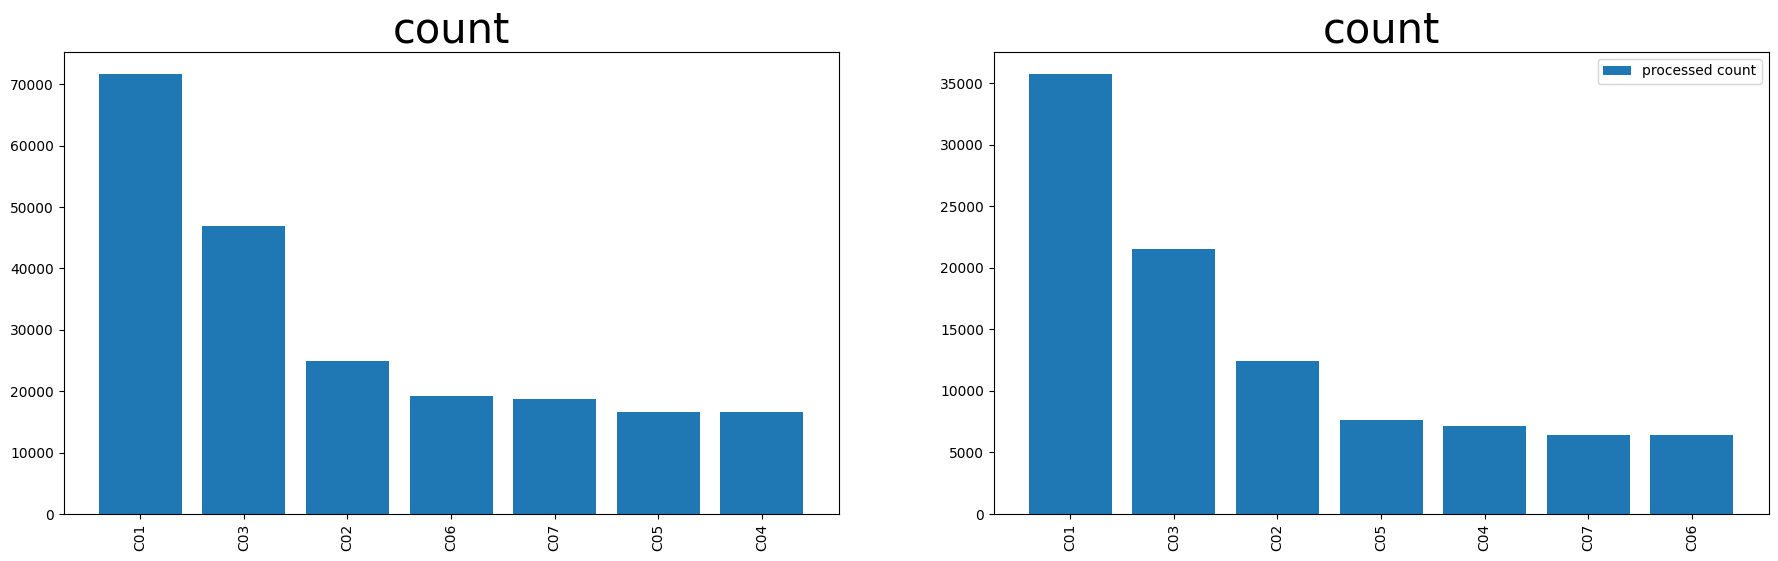

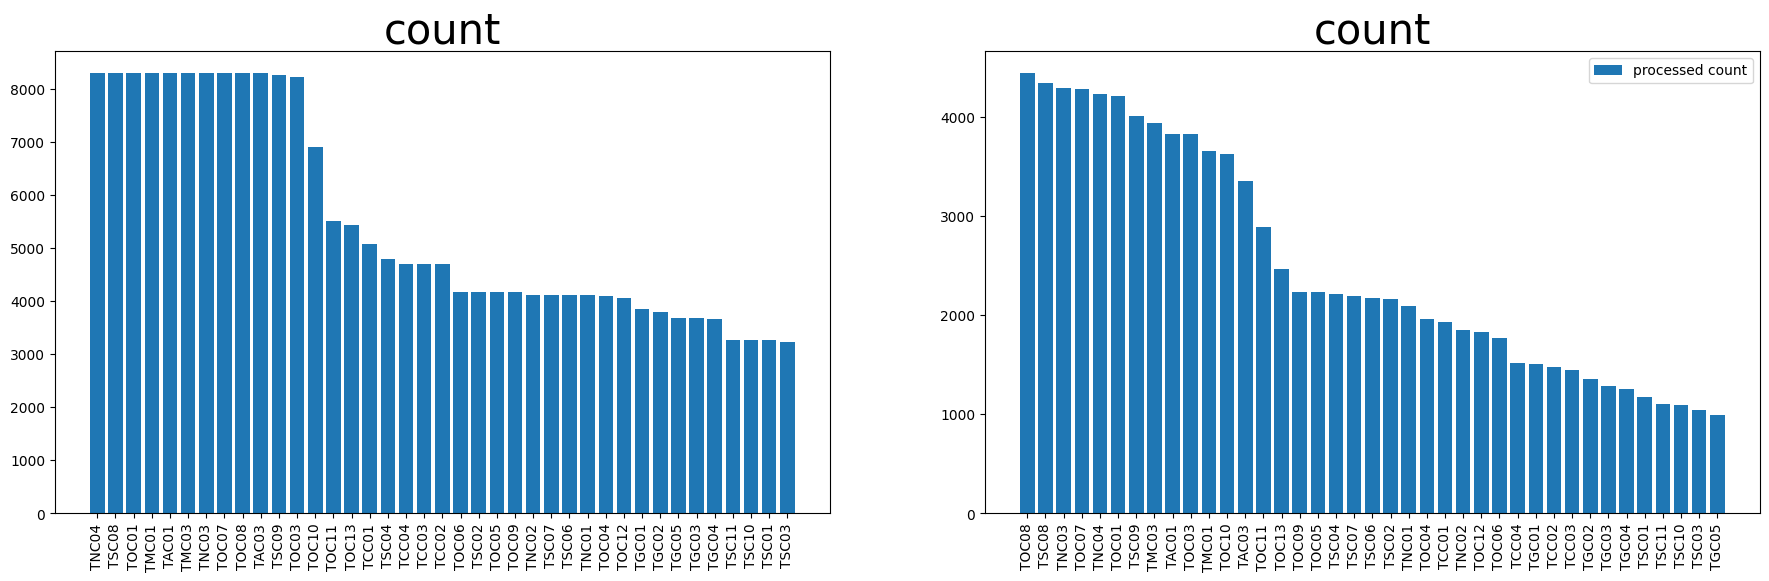

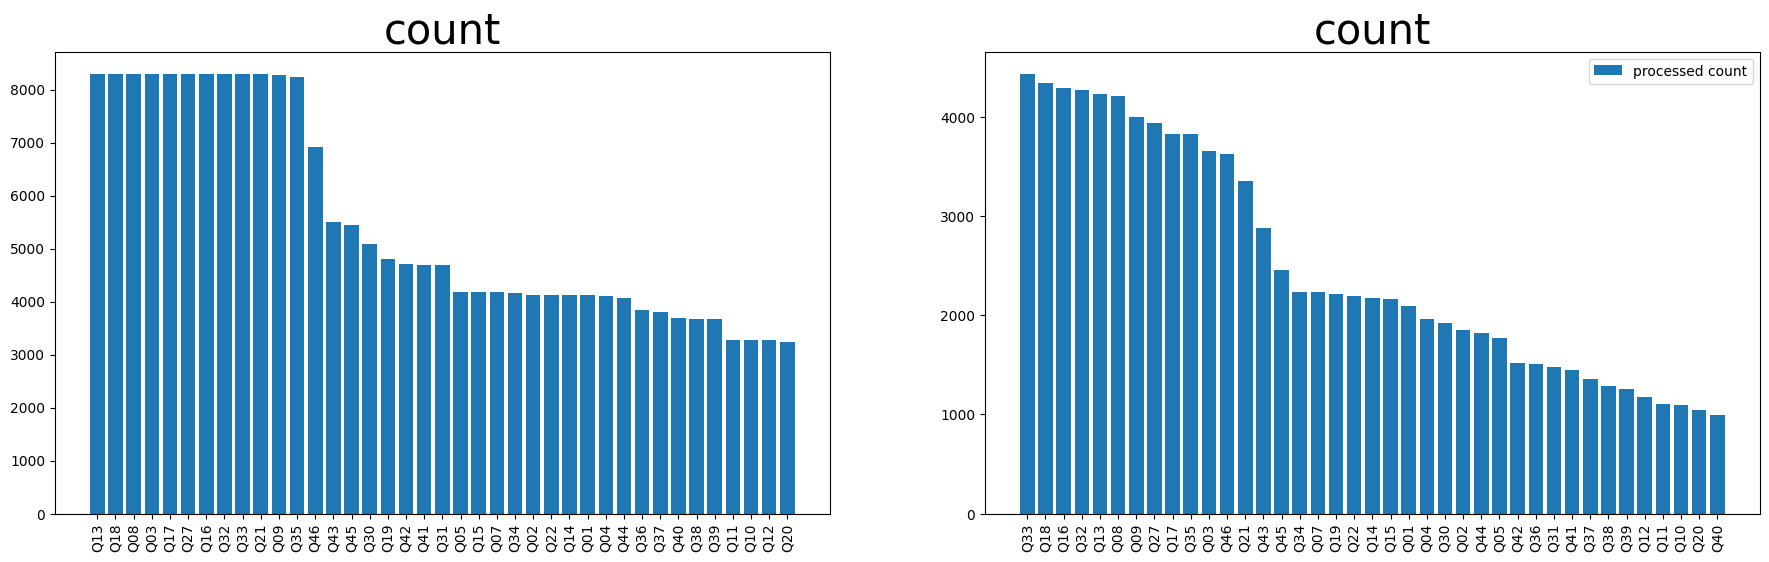

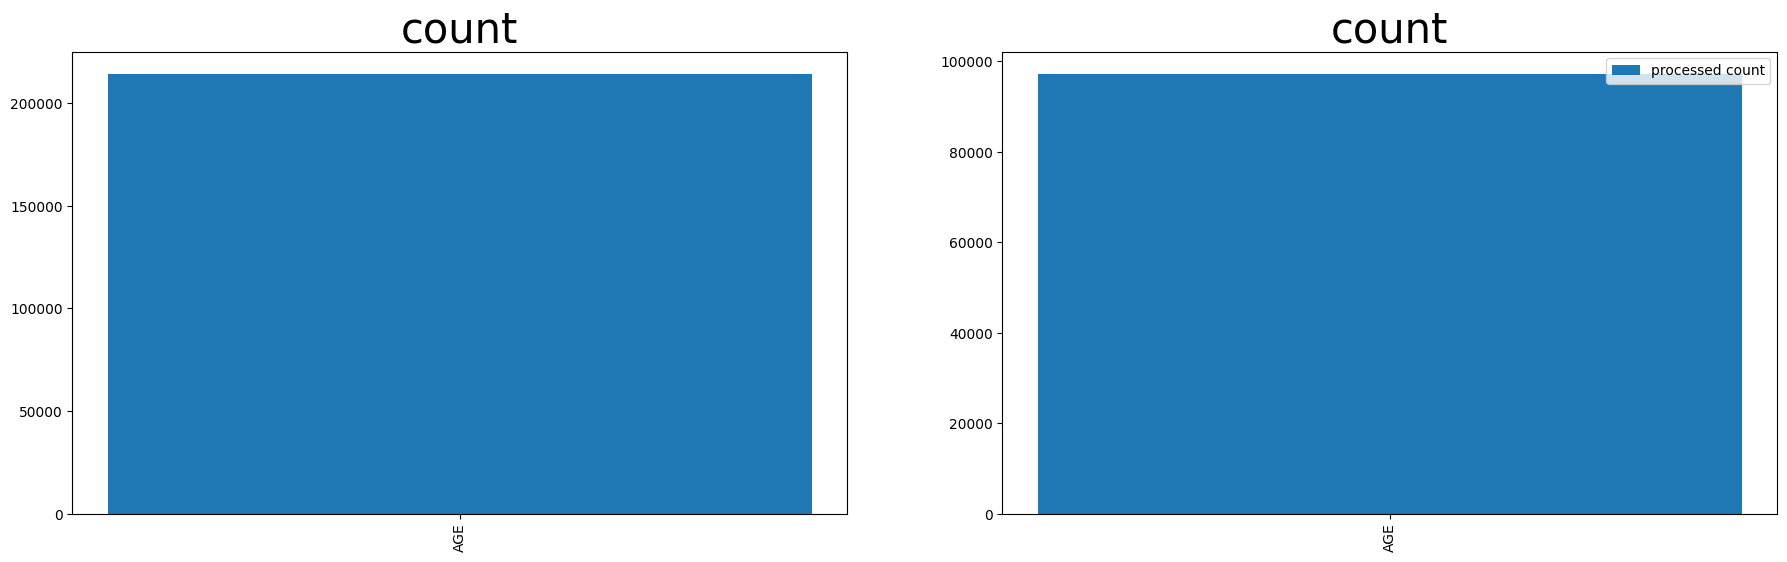

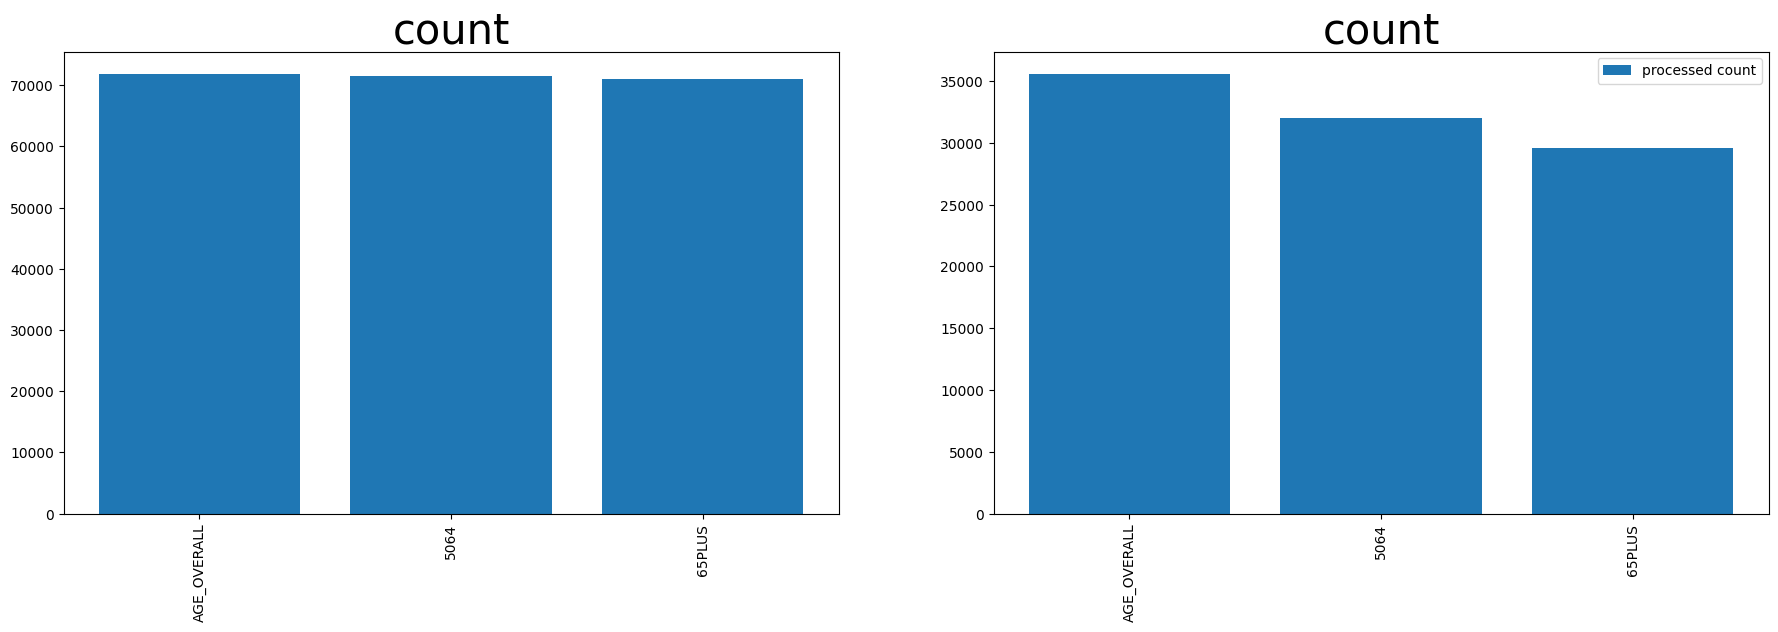

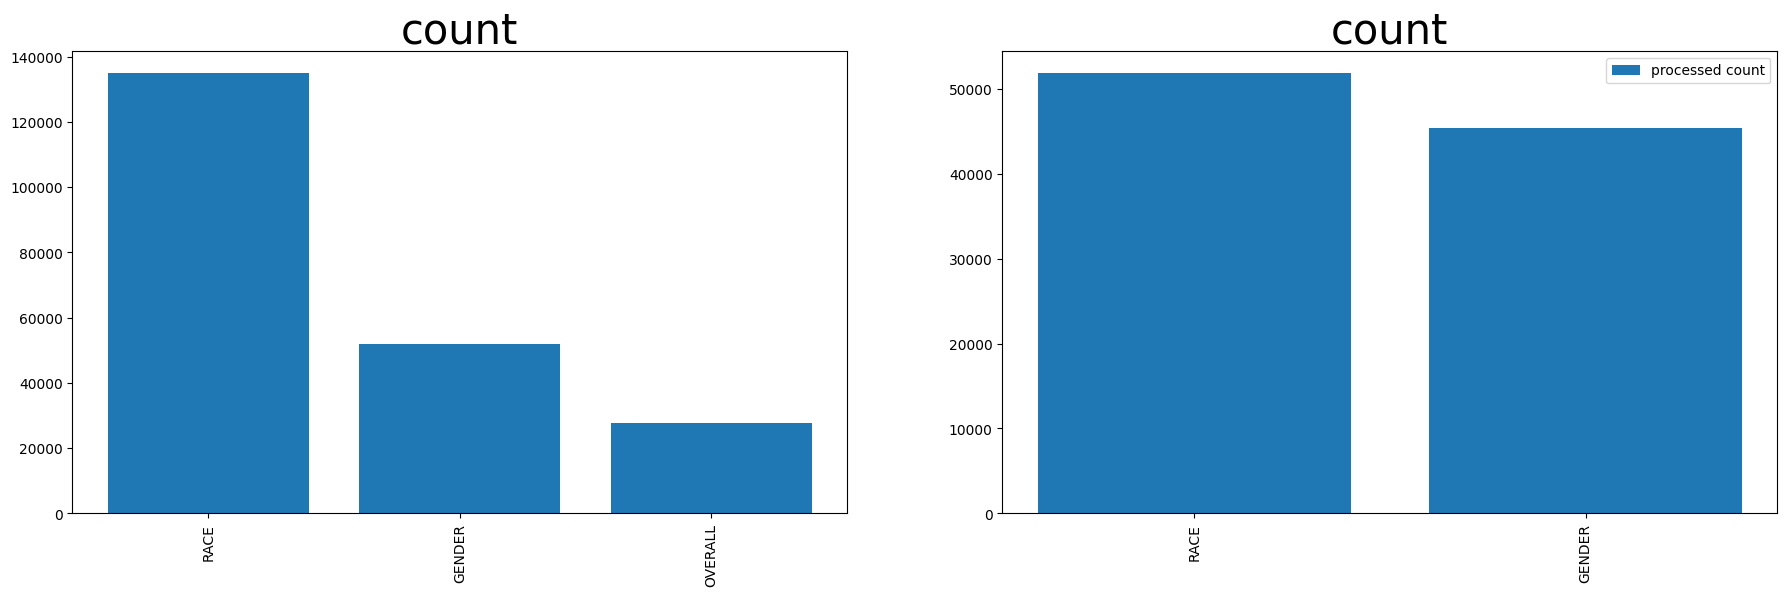

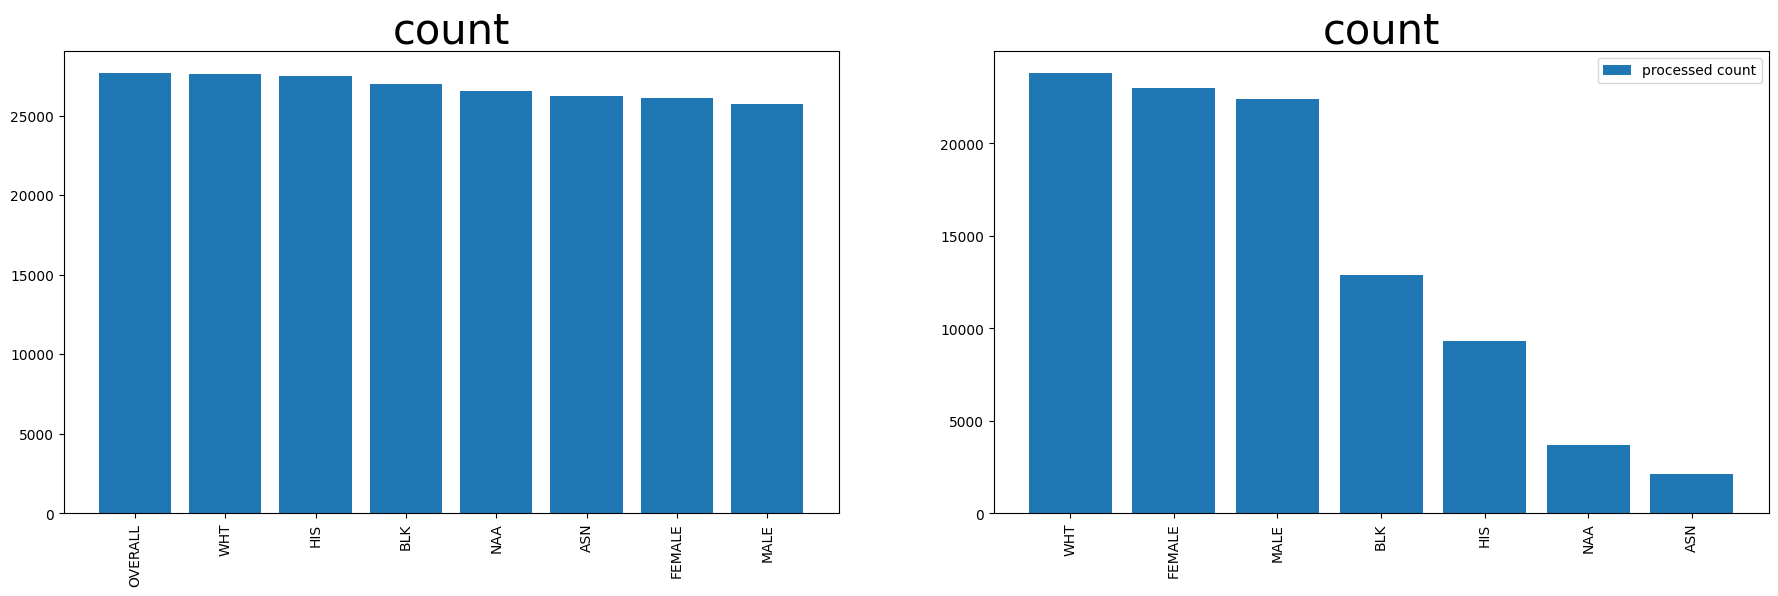

In [24]:
nominal_summary(data, nominal_index, new_data)

In [25]:
numerical_summary(data, numerical_index=numerical_index, new_df=new_data)

descriptive statistics (YearStart):
          Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2017.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
Processed Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2017.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
descriptive statistics (YearEnd):
          Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2018.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
Processed Data: Min:  2015.0000	Q1(25%):  2016.0000	Q2(50%):  2018.0000	Q3(75%):  2019.0000	Max:  2020.0000	Missing: 0
descriptive statistics (Data_Value):
          Data: Min:  0.0000	Q1(25%):  15.3000	Q2(50%):  32.5000	Q3(75%):  56.8000	Max:  100.0000	Missing: 69833
Processed Data: Min:  1.0000	Q1(25%):  15.5000	Q2(50%):  32.9000	Q3(75%):  57.4000	Max:  99.9000	Missing: 0
descriptive statistics (Data_Value_Alt):
          Data: Min:  0.0000	Q1(25%):  15.3000	Q2(50%):  32.5000	Q3(75%):  56.8000	Max:  100.0000	Missing: 69833
Processed Data: Min:  1.0000	Q1(25%):  15.

In [29]:
def box_plot(df, label=None, new_df=None):
    if new_df is None:
        plt.figure()
        plt.title('Data')
        sns.boxplot(y=label, data=df, palette='Set2')
    else:
        plt.figure(figsize=(14, 8))
        plt.subplot(121)
        plt.title('Data')
        sns.boxplot(y=label, data=df, palette='Set1')
        plt.subplot(122)
        plt.title('Processed Data')
        sns.boxplot(y=label, data=new_df, palette='Set2')


def hist_plot(df, label=None, bins=10, new_df=None):
    if new_df is None:
        plt.figure()
        plt.title('Data')
        sns.histplot(df[label].dropna(), bins=bins, kde=False)
    else:
        plt.figure(figsize=(14, 8))
        plt.subplot(121)
        plt.title('Data')
        sns.histplot(df[label].dropna(), bins=bins, kde=False)
        plt.subplot(122)
        plt.title('Processed Data')
        sns.histplot(new_df[label].dropna(), bins=bins, kde=False)


def viz_pairs(df, labels=None, bins=20, new_df=None):
    for label in labels:
        box_plot(df, label=label, new_df=new_df)
        hist_plot(df, label=label, bins=bins, new_df=new_df)

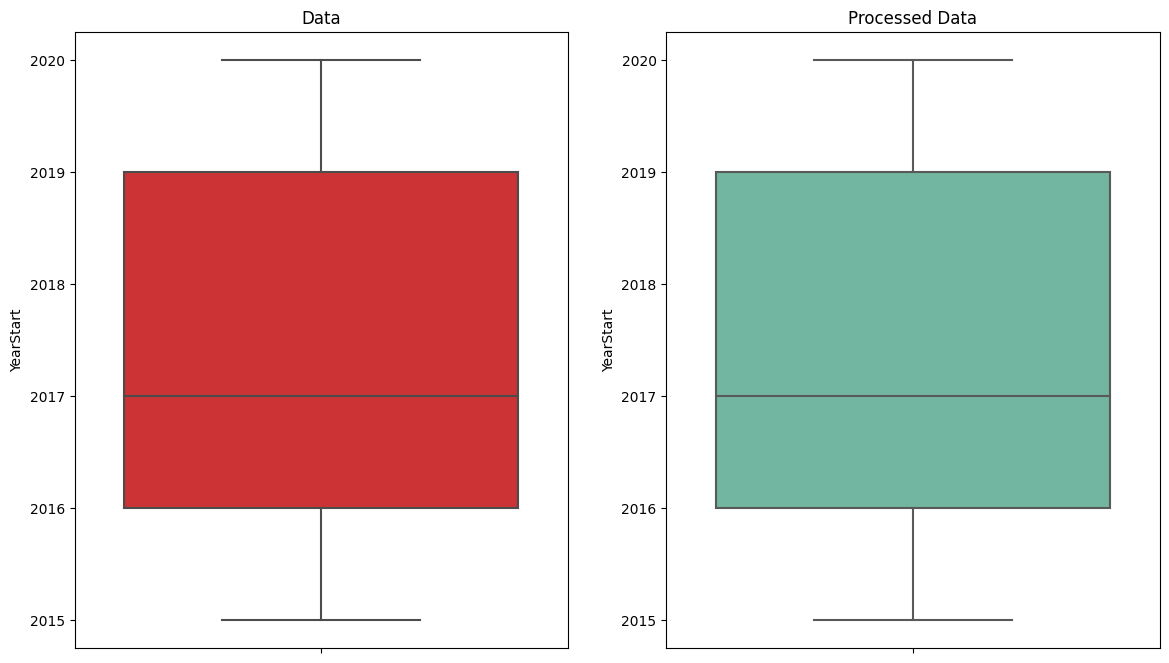

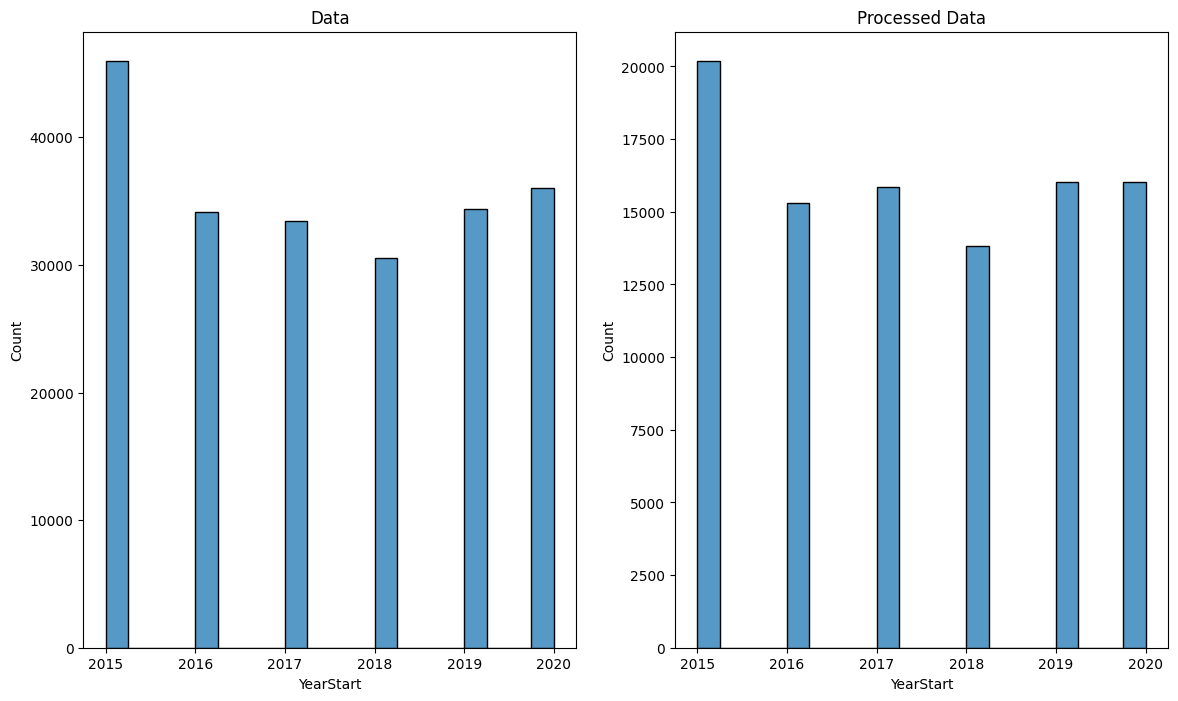

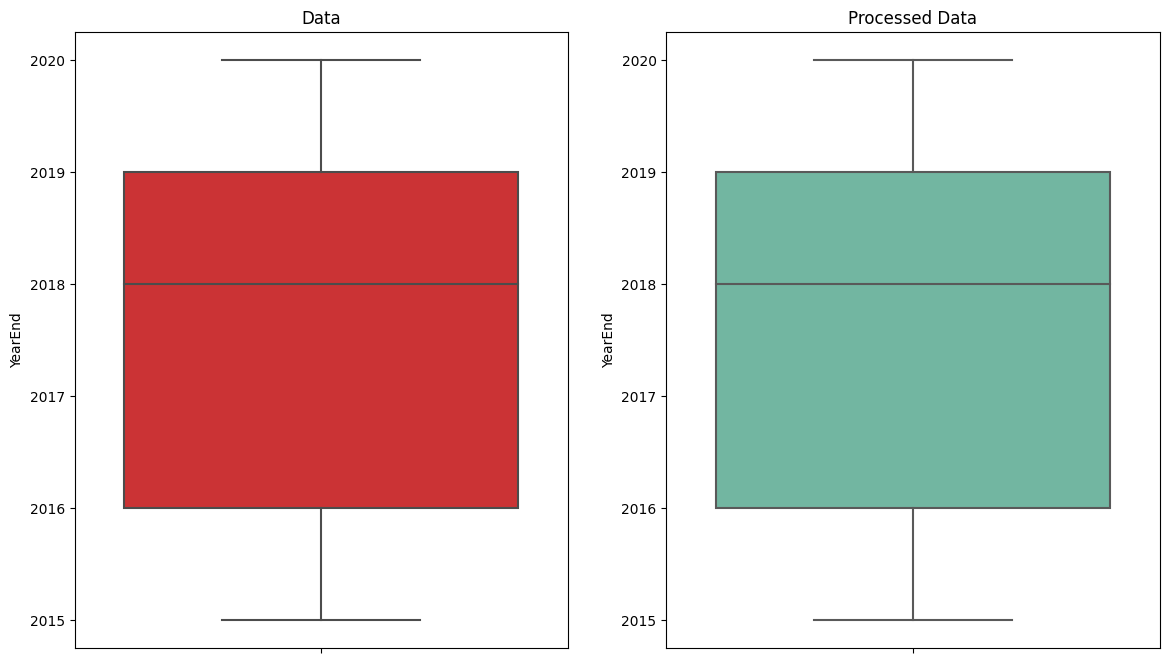

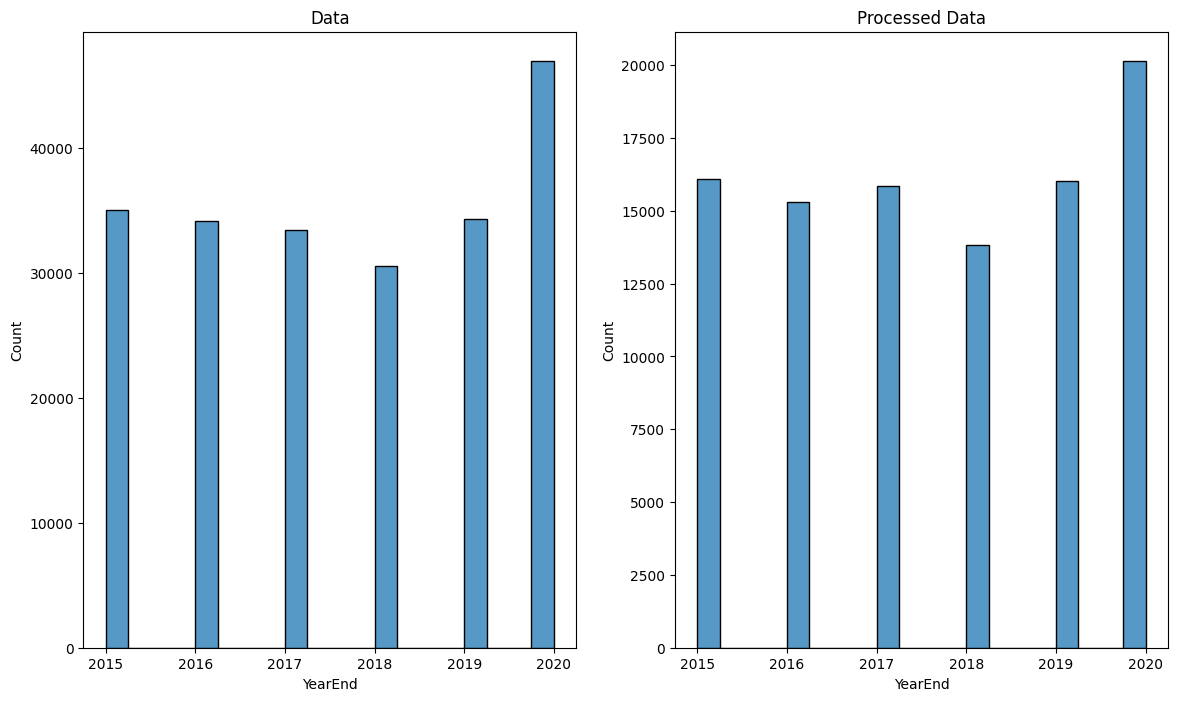

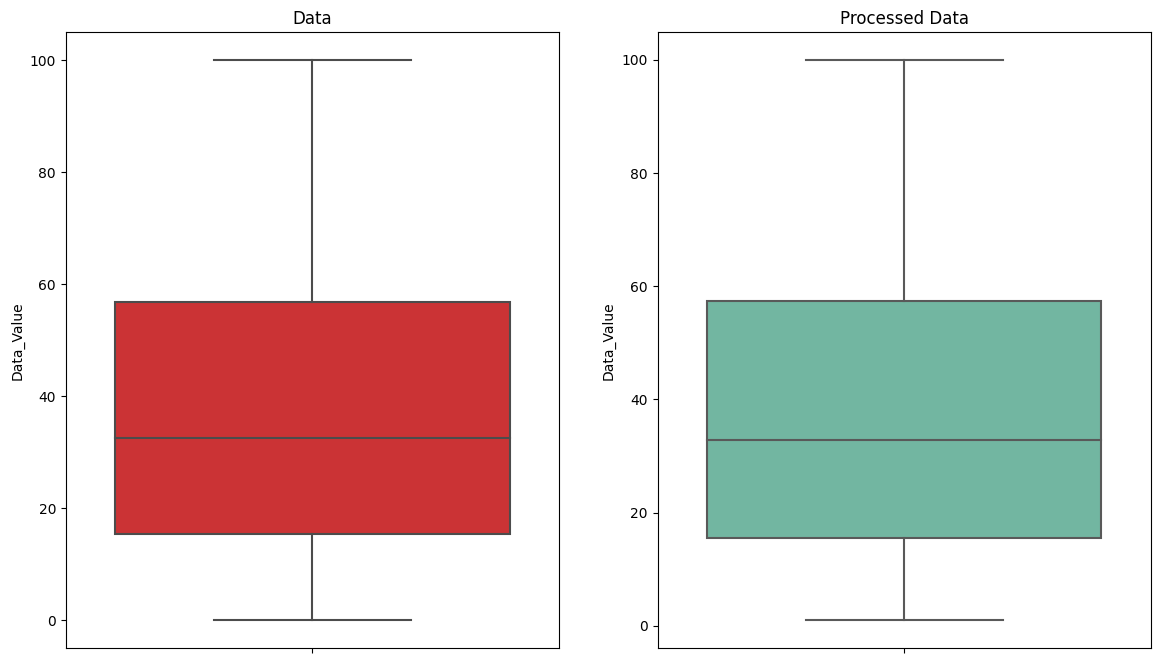

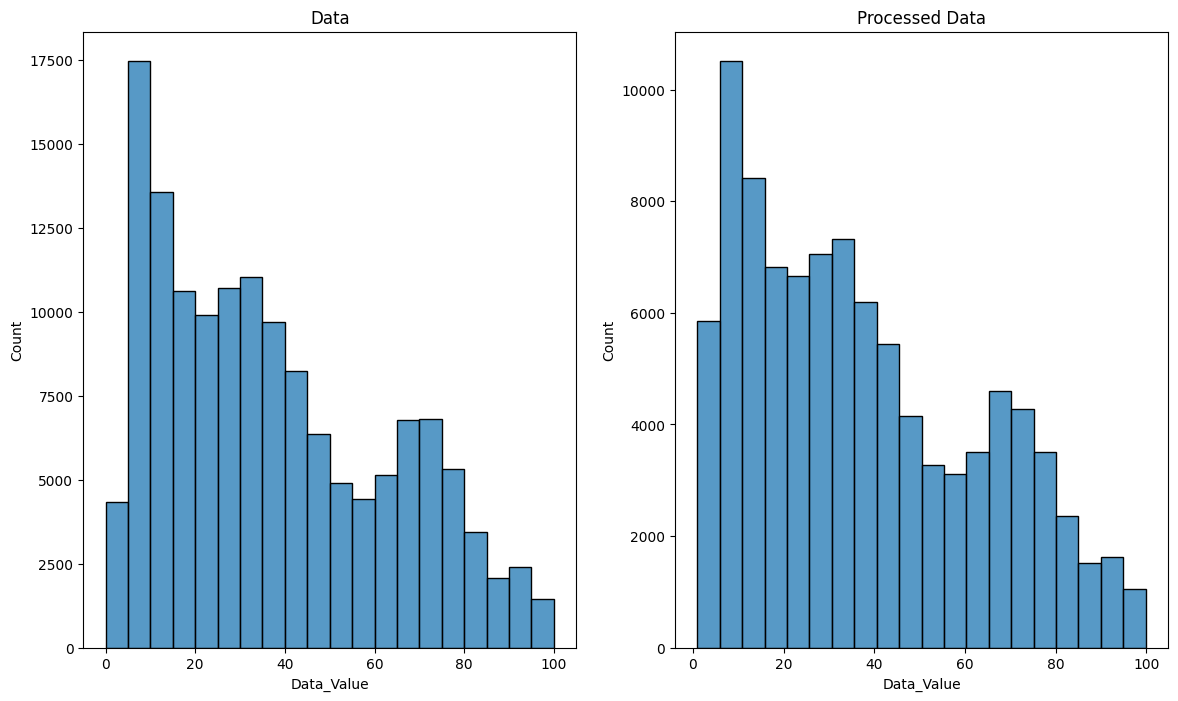

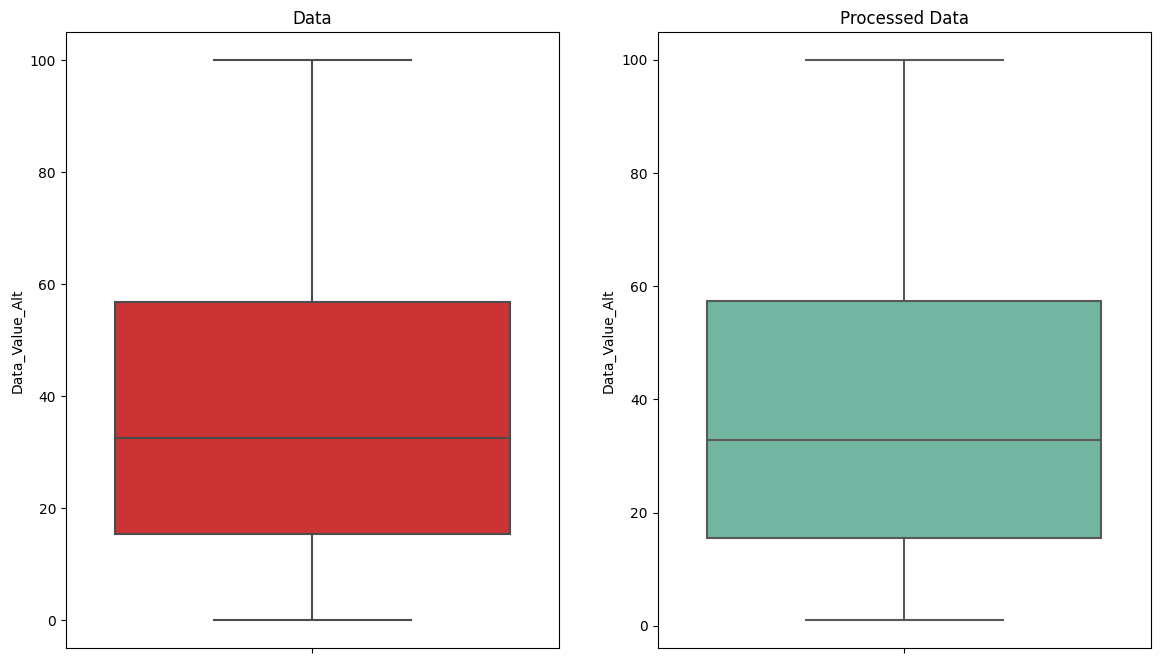

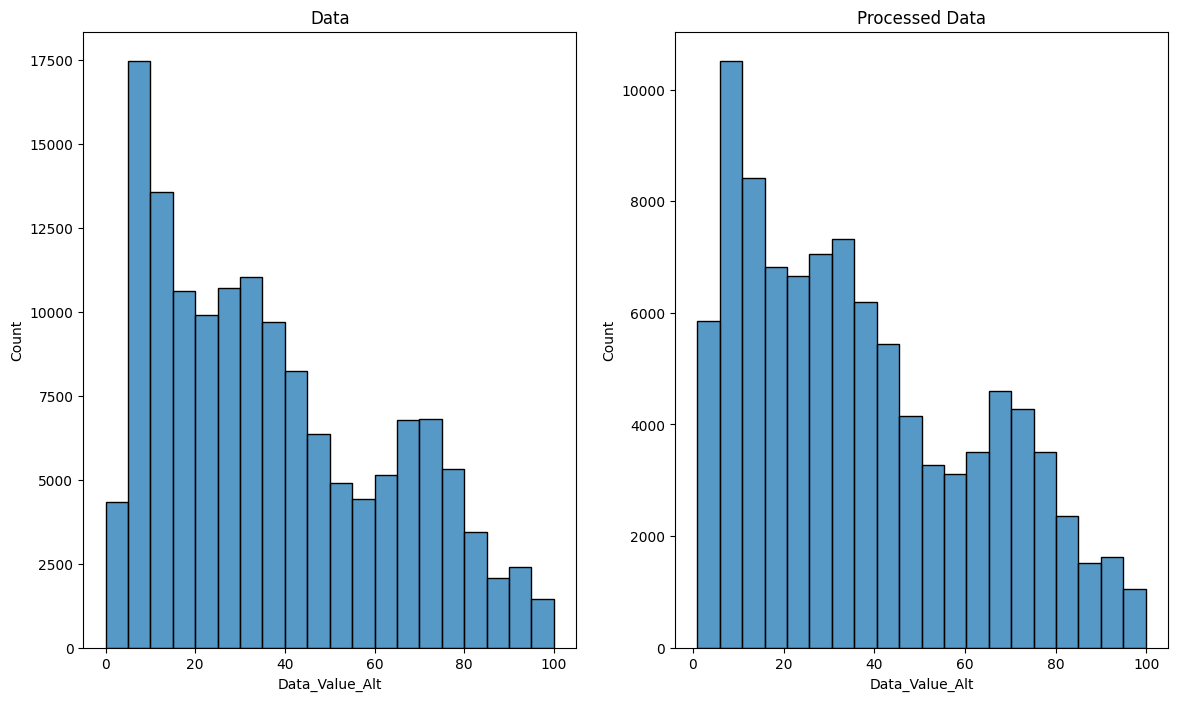

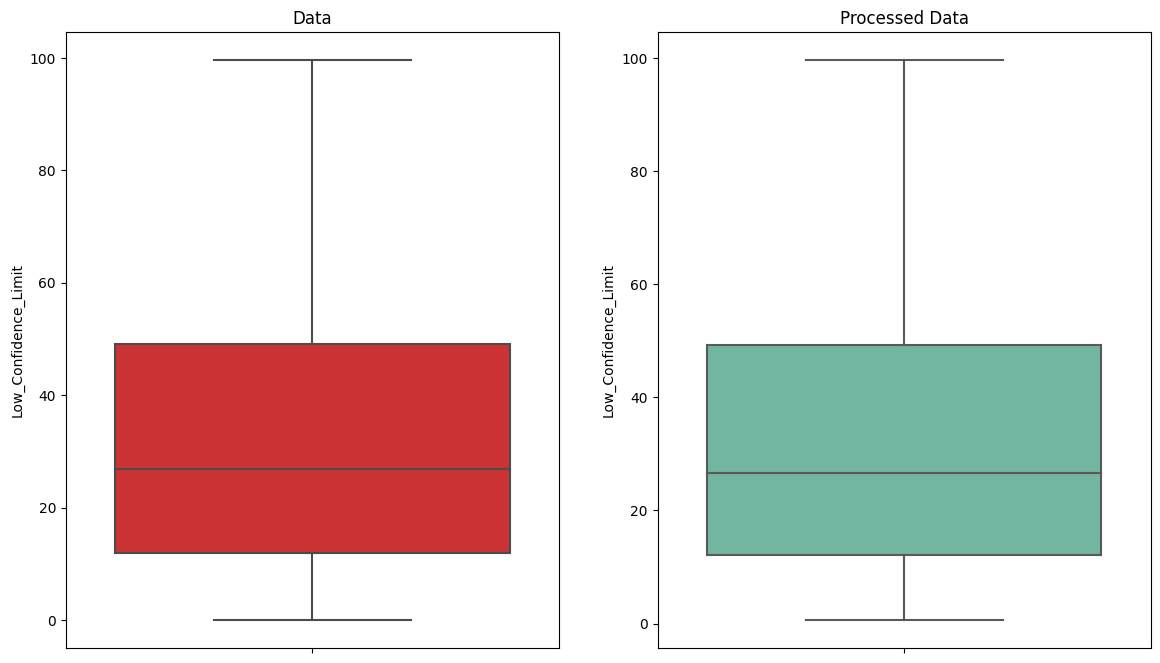

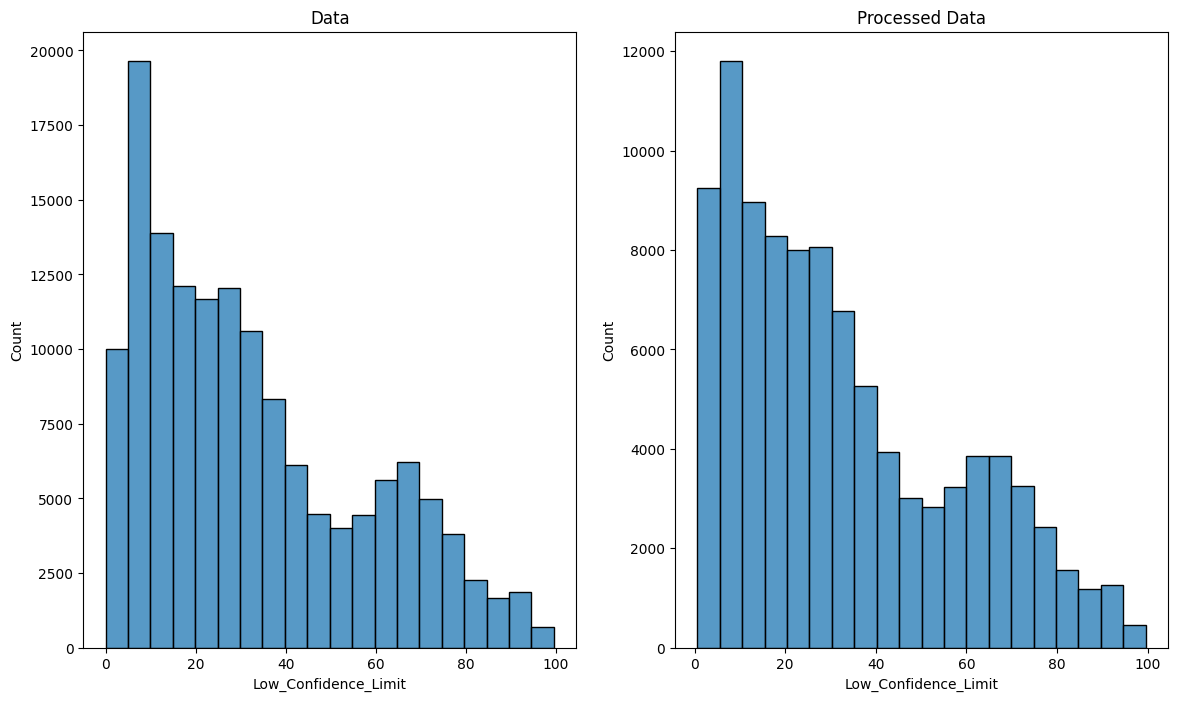

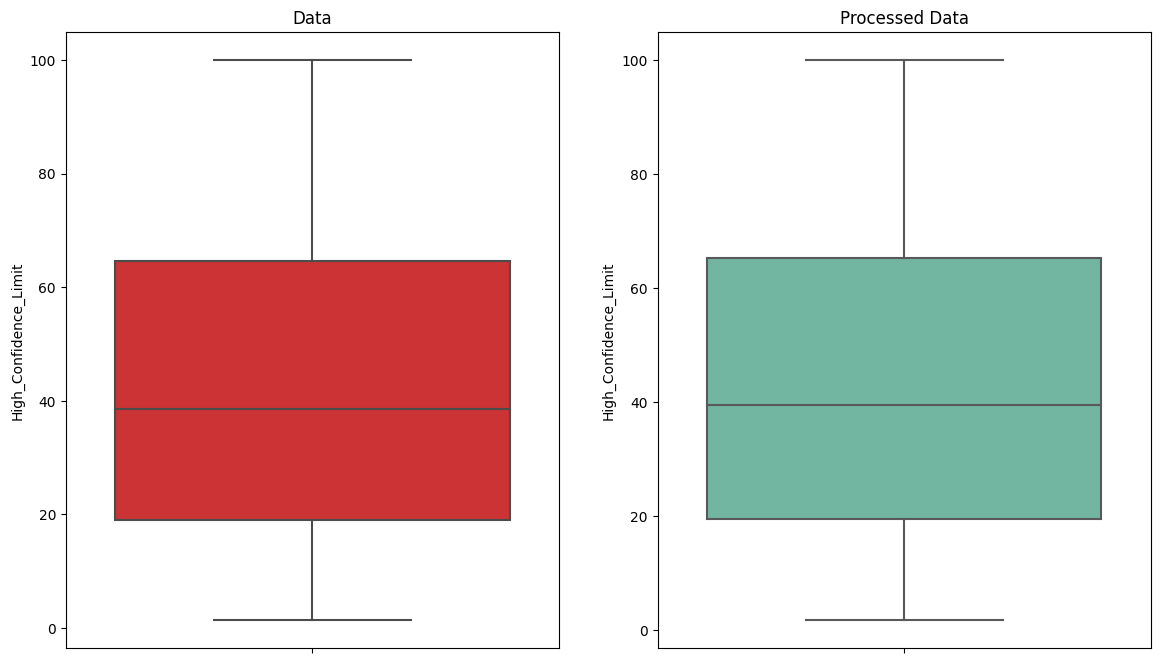

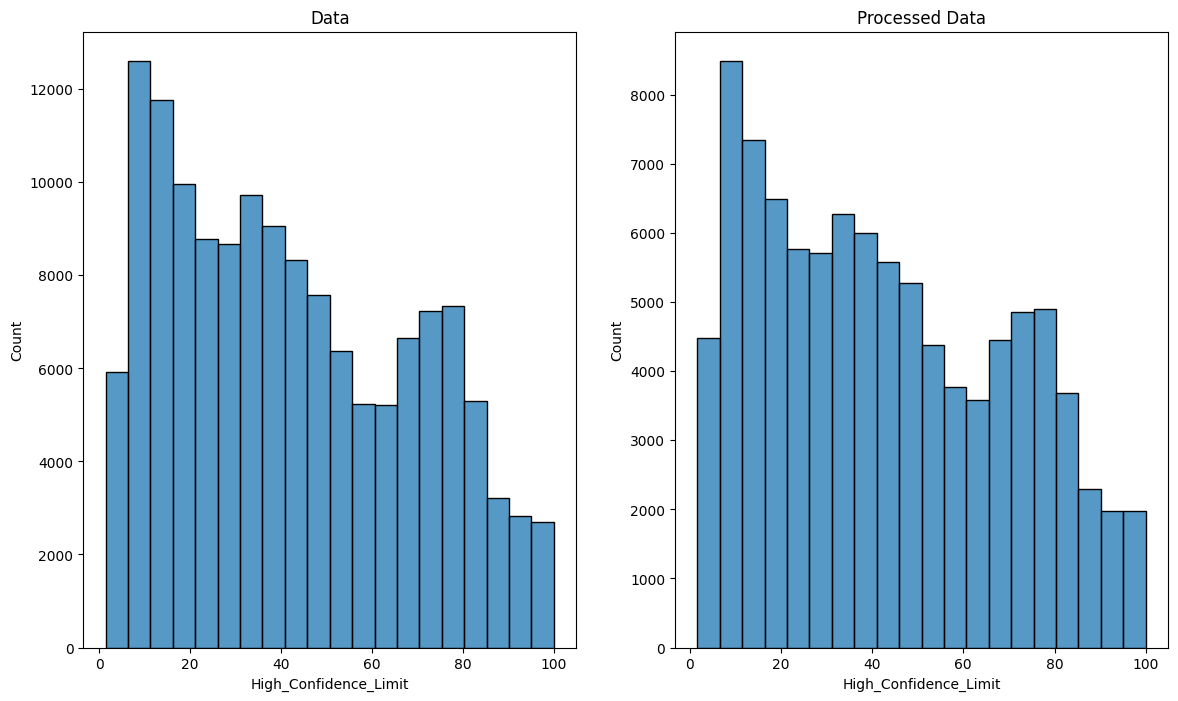

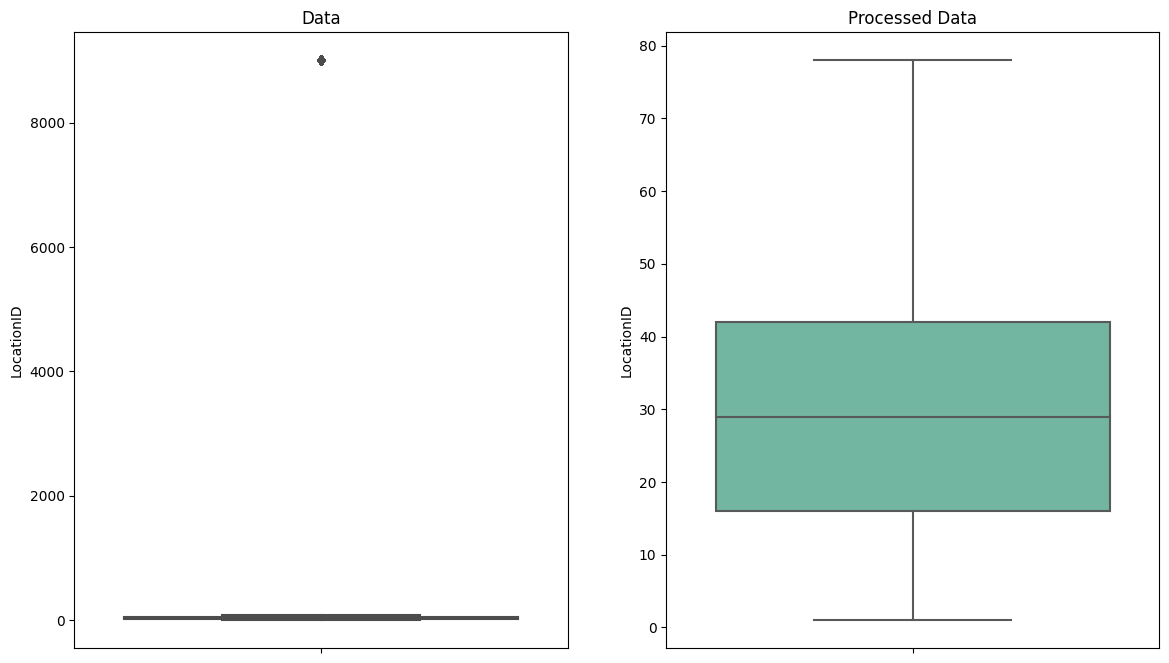

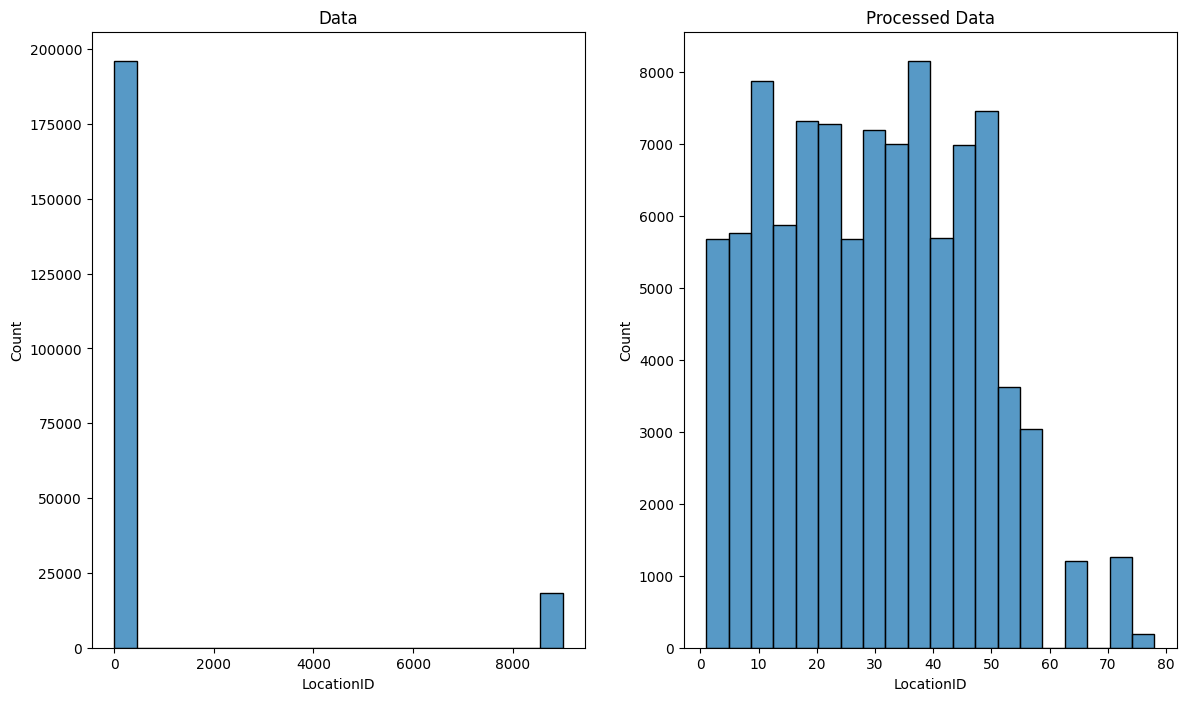

In [30]:
viz_pairs(data, labels=numerical_index, bins=20, new_df=new_data)

In [ ]:
import pandas as pd
def remove_missing_parts(df: pd.DataFrame):
    '''将缺失部分剔除'''
    return df.dropna(axis=0)


def fill_in_missing_values_with_the_highest_frequency_value(df: pd.DataFrame):
    '''用最高频率值来填补缺失值'''
    cpdf = df.copy(deep=True)
    for key in cpdf.columns:
        cpdf[key].fillna(cpdf[key].mode()[0], inplace=True)
    return cpdf


def fill_in_missing_values_through_attribute_correlation(df: pd.DataFrame, miss_index, complete_index):
    '''通过属性的相关关系来填补缺失值'''
    
    def set_miss_values(df: pd.DataFrame, complete_index):
        enc_label = OrdinalEncoder()
        enc_feature = OrdinalEncoder()
        missing_index = complete_index[0]
        train_df = df[complete_index]

        known_values = np.array(train_df[train_df[missing_index].notnull()])
        unknow_values = np.array(train_df[train_df[missing_index].isnull()])
 
        y = known_values[:, 0].reshape(-1, 1)
        enc_label.fit(y)
        y = enc_label.transform(y)

        X = known_values[:, 1:]
        test_X = unknow_values[:, 1:]
        all_X = np.row_stack((X, test_X))
        enc_feature.fit(all_X)
        X = enc_feature.transform(X)

        rfr = RandomForestRegressor(random_state=0, n_estimators=20, n_jobs=10)
        rfr.fit(X, y.ravel())

        predicted_values = rfr.predict(enc_feature.transform(unknow_values[:, 1:]))
        predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))

        df.loc[(df[missing_index].isnull()), missing_index] = predicted_values
        return df
    
    cpdf = df.copy(deep=True)
    for i in range(0, len(miss_index)):
        complete_index.insert(0, miss_index[i])
        cpdf = set_miss_values(cpdf, complete_index)
    return cpdf


def fill_in_missing_values_through_similarity_between_data_objects(df: pd.DataFrame, numerical_index, k=30):
    '''通过数据对象之间的相似性来填补缺失值'''
    cpdf = df.copy(deep=True)
    imputed_training = fast_knn(cpdf[numerical_index].values, k=k)
    imputed_training = pd.DataFrame(data=imputed_training, columns=numerical_index)
    cpdf[numerical_index] = imputed_training[numerical_index]
    return cpdf

In [ ]:
new_data = fill_in_missing_values_through_similarity_between_data_objects(data, numerical_index=numerical_index, k=100)
new_data.info()

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
new_data = fill_in_missing_values_with_the_highest_frequency_value(data)
new_data.info()

In [43]:
pip install -U numpy==1.23.5

^C
Note: you may need to restart the kernel to use updated packages.
